In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('df.csv', index_col=0)
df

,VehHourTrav,VehHourTrav_ns,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,mean_lambda,revenue_s,revenue_ns,Fare_Discount,...,lambda_shared,_typ,dtype,Replication,Batch,shared_discount,Start_time,End_time,Demand_size,del_VehHourTrav
0,92970,114141,117411,114141,1407.676625,1427.5440,0.305817,136969.20,171211.5,-0.20,...,0.305817,DotMap(_typ=DotMap()),DotMap(_typ=DotMap()),0,0,0.20,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.227719
1,82898,114141,120049,114141,1392.810710,1427.5440,0.378822,130120.74,171211.5,-0.24,...,0.378822,DotMap(_typ=DotMap()),DotMap(_typ=DotMap()),0,0,0.24,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.376885
2,79241,114141,122852,114141,1380.820575,1427.5440,0.396498,123272.28,171211.5,-0.28,...,0.396498,DotMap(_typ=DotMap()),DotMap(_typ=DotMap()),0,0,0.28,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.440429
3,112058,132553,134915,132553,1634.817525,1657.8305,0.287076,159063.60,198829.5,-0.20,...,0.287076,DotMap(_typ=DotMap()),DotMap(_typ=DotMap()),0,1,0.20,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.182896
4,105589,132553,137754,132553,1613.657885,1657.8305,0.294371,151110.42,198829.5,-0.24,...,0.294371,DotMap(_typ=DotMap()),DotMap(_typ=DotMap()),0,1,0.24,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.255368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25901,81563,99765,103560,99765,1215.942735,1247.7390,0.267898,113732.10,149647.5,-0.24,...,0.267898,DotMap(_typ=DotMap()),DotMap(_typ=DotMap()),0,8711,0.24,2016-06-30 23:00:05,2016-06-30 23:29:41,181,0.223165
25902,76707,99765,104919,99765,1207.303570,1247.7390,0.338975,107746.20,149647.5,-0.28,...,0.338975,DotMap(_typ=DotMap()),DotMap(_typ=DotMap()),0,8711,0.28,2016-06-30 23:00:05,2016-06-30 23:29:41,181,0.300598
25903,72772,79742,81289,79742,989.600950,997.2970,0.220175,95690.40,119613.0,-0.20,...,0.220175,DotMap(_typ=DotMap()),DotMap(_typ=DotMap()),0,8712,0.20,2016-06-30 23:30:04,2016-06-30 23:59:37,150,0.095779
25904,67393,79742,83147,79742,976.086920,997.2970,0.254399,90905.88,119613.0,-0.24,...,0.254399,DotMap(_typ=DotMap()),DotMap(_typ=DotMap()),0,8712,0.24,2016-06-30 23:30:04,2016-06-30 23:59:37,150,0.183239


In [7]:
df.Start_time = pd.to_datetime(df.Start_time)
df.End_time = pd.to_datetime(df.End_time)

In [8]:
df.to_csv('KPI_resultsNYC.csv')
df.Start_time = df.apply(lambda row: pd.Timestamp(row.Start_time), axis=1) #convert "Start_time" to time type

In [9]:
df['del_VehHourTrav']=(df['VehHourTrav_ns']-df['VehHourTrav'])/df['VehHourTrav']

In [10]:
df['del_PassUtility']=abs((df['PassUtility_ns']-df['PassUtility'])/df['PassUtility'])

In [11]:
df['Occupancy']=df['PassHourTrav']/df['VehHourTrav']

In [12]:
df['del_PassHourTrav']=abs((df['PassHourTrav_ns']-df['PassHourTrav'])/df['PassHourTrav'])

In [13]:
df1_2 = df.loc[(df.shared_discount==0.2) & (pd.Timestamp('2016-01-01 00:00:00')<df.Start_time) & (df.Start_time<pd.Timestamp('2016-01-02 00:00:00'))]
df1_2

,VehHourTrav,VehHourTrav_ns,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,mean_lambda,revenue_s,revenue_ns,Fare_Discount,...,Replication,Batch,shared_discount,Start_time,End_time,Demand_size,del_VehHourTrav,del_PassUtility,Occupancy,del_PassHourTrav
0,92970,114141,117411,114141,1407.676625,1427.5440,0.305817,136969.2,171211.5,-0.2,...,0,0,0.2,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.227719,0.014114,1.262891,0.027851
3,112058,132553,134915,132553,1634.817525,1657.8305,0.287076,159063.6,198829.5,-0.2,...,0,1,0.2,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.182896,0.014077,1.203975,0.017507
6,103341,116591,118656,116591,1441.534350,1458.1990,0.247042,139909.2,174886.5,-0.2,...,0,2,0.2,2016-01-01 01:00:07,2016-01-01 01:29:59,208,0.128216,0.011560,1.148199,0.017403
9,99507,115304,117950,115304,1428.225075,1442.1145,0.284782,138364.8,172956.0,-0.2,...,0,3,0.2,2016-01-01 01:30:05,2016-01-01 01:59:56,200,0.158753,0.009725,1.185344,0.022433
12,96047,108515,110730,108515,1343.162775,1357.1605,0.258746,130218.0,162772.5,-0.2,...,0,4,0.2,2016-01-01 02:00:04,2016-01-01 02:29:50,195,0.129811,0.010421,1.152873,0.020004
15,82603,96415,98850,96415,1187.193150,1205.7050,0.261464,115698.0,144622.5,-0.2,...,0,5,0.2,2016-01-01 02:30:04,2016-01-01 02:59:33,147,0.167209,0.015593,1.196688,0.024633
18,92004,105219,107264,105219,1301.623650,1315.8225,0.286342,126262.8,157828.5,-0.2,...,0,6,0.2,2016-01-01 03:00:22,2016-01-01 03:29:49,158,0.143635,0.010909,1.165862,0.019065
21,77037,89338,91698,89338,1105.447575,1117.2725,0.271048,107205.6,134007.0,-0.2,...,0,7,0.2,2016-01-01 03:30:18,2016-01-01 03:59:50,153,0.159677,0.010697,1.190311,0.025737
24,60541,67975,69540,67975,839.923800,850.1390,0.212183,81570.0,101962.5,-0.2,...,0,8,0.2,2016-01-01 04:00:05,2016-01-01 04:29:47,117,0.122793,0.012162,1.148643,0.022505
27,36051,39207,39863,39207,486.474400,490.3560,0.238975,47048.4,58810.5,-0.2,...,0,9,0.2,2016-01-01 04:30:10,2016-01-01 04:59:46,69,0.087543,0.007979,1.105739,0.016456


In [14]:
df1_2_24 = df.loc[(df.shared_discount==0.24) & (pd.Timestamp('2016-01-01 00:00:00')<df.Start_time) & (df.Start_time<pd.Timestamp('2016-01-02 00:00:00'))]
df1_2_24

,VehHourTrav,VehHourTrav_ns,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,mean_lambda,revenue_s,revenue_ns,Fare_Discount,...,Replication,Batch,shared_discount,Start_time,End_time,Demand_size,del_VehHourTrav,del_PassUtility,Occupancy,del_PassHourTrav
1,82898,114141,120049,114141,1392.810710,1427.5440,0.378822,130120.74,171211.5,-0.24,...,0,0,0.24,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.376885,0.024938,1.448153,0.049213
4,105589,132553,137754,132553,1613.657885,1657.8305,0.294371,151110.42,198829.5,-0.24,...,0,1,0.24,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.255368,0.027374,1.304625,0.037756
7,92300,116591,121750,116591,1426.279390,1458.1990,0.295593,132913.74,174886.5,-0.24,...,0,2,0.24,2016-01-01 01:00:07,2016-01-01 01:29:59,208,0.263174,0.022380,1.319068,0.042374
10,92018,115304,119724,115304,1409.980610,1442.1145,0.303783,131446.56,172956.0,-0.24,...,0,3,0.24,2016-01-01 01:30:05,2016-01-01 01:59:56,200,0.253059,0.022790,1.301093,0.036918
13,90328,108515,112770,108515,1325.864570,1357.1605,0.284842,123707.10,162772.5,-0.24,...,0,4,0.24,2016-01-01 02:00:04,2016-01-01 02:29:50,195,0.201344,0.023604,1.248450,0.037732
16,75847,96415,100831,96415,1177.496190,1205.7050,0.319596,109913.10,144622.5,-0.24,...,0,5,0.24,2016-01-01 02:30:04,2016-01-01 02:59:33,147,0.271178,0.023957,1.329400,0.043796
19,87474,105219,108917,105219,1287.782045,1315.8225,0.301143,119949.66,157828.5,-0.24,...,0,6,0.24,2016-01-01 03:00:22,2016-01-01 03:29:49,158,0.202860,0.021774,1.245136,0.033952
22,70125,89338,93081,89338,1091.651845,1117.2725,0.318273,101845.32,134007.0,-0.24,...,0,7,0.24,2016-01-01 03:30:18,2016-01-01 03:59:50,153,0.273982,0.023470,1.327358,0.040212
25,56404,67975,71545,67975,833.360325,850.1390,0.275730,77491.50,101962.5,-0.24,...,0,8,0.24,2016-01-01 04:00:05,2016-01-01 04:29:47,117,0.205145,0.020134,1.268438,0.049899
28,33429,39207,40145,39207,478.567160,490.3560,0.262451,44695.98,58810.5,-0.24,...,0,9,0.24,2016-01-01 04:30:10,2016-01-01 04:59:46,69,0.172844,0.024634,1.200903,0.023365


In [15]:
df2_3= df.loc[(df.shared_discount==0.2) & (pd.Timestamp('2016-01-02 00:00:00')<df.Start_time) & (df.Start_time<pd.Timestamp('2016-01-03 00:00:00'))]
df2_3

,VehHourTrav,VehHourTrav_ns,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,mean_lambda,revenue_s,revenue_ns,Fare_Discount,...,Replication,Batch,shared_discount,Start_time,End_time,Demand_size,del_VehHourTrav,del_PassUtility,Occupancy,del_PassHourTrav
143,56462,65976,67120,65976,812.507950,825.1560,0.291209,79171.2,98964.0,-0.2,...,0,48,0.2,2016-01-02 00:00:20,2016-01-02 00:29:57,125,0.168503,0.015567,1.188764,0.017044
146,30924,34899,35524,34899,432.153700,436.5585,0.298519,41878.8,52348.5,-0.2,...,0,49,0.2,2016-01-02 00:30:11,2016-01-02 00:58:44,68,0.128541,0.010193,1.148752,0.017594
149,45587,48750,49523,48750,604.204550,609.7680,0.195377,58500.0,73125.0,-0.2,...,0,50,0.2,2016-01-02 01:00:02,2016-01-02 01:29:53,88,0.069384,0.009208,1.086340,0.015609
152,32132,33861,34348,33861,420.164750,423.5415,0.154506,40633.2,50791.5,-0.2,...,0,51,0.2,2016-01-02 01:30:17,2016-01-02 01:59:35,67,0.053809,0.008037,1.068966,0.014178
155,30764,32637,32977,32637,405.759225,408.2385,0.261106,39164.4,48955.5,-0.2,...,0,52,0.2,2016-01-02 02:00:14,2016-01-02 02:29:48,69,0.060883,0.006110,1.071935,0.010310
158,17796,18244,18289,18244,227.960950,228.2195,0.250000,21892.8,27366.0,-0.2,...,0,53,0.2,2016-01-02 02:30:09,2016-01-02 02:59:54,44,0.025174,0.001134,1.027703,0.002460
161,16433,17206,17395,17206,213.581500,215.2010,0.200378,20647.2,25809.0,-0.2,...,0,54,0.2,2016-01-02 03:01:34,2016-01-02 03:29:07,39,0.047039,0.007583,1.058541,0.010865
164,18146,19320,19455,19320,239.518850,241.6500,0.243162,23184.0,28980.0,-0.2,...,0,55,0.2,2016-01-02 03:30:11,2016-01-02 03:59:11,42,0.064697,0.008898,1.072137,0.006939
167,13859,13859,13859,13859,173.347000,173.3470,NaN,16630.8,20788.5,-0.2,...,0,56,0.2,2016-01-02 04:00:26,2016-01-02 04:29:35,27,0.000000,0.000000,1.000000,0.000000
170,8779,8779,8779,8779,109.796000,109.7960,NaN,10534.8,13168.5,-0.2,...,0,57,0.2,2016-01-02 04:31:00,2016-01-02 04:59:34,16,0.000000,0.000000,1.000000,0.000000


<AxesSubplot:xlabel='Start_time', ylabel='del_VehHourTrav'>

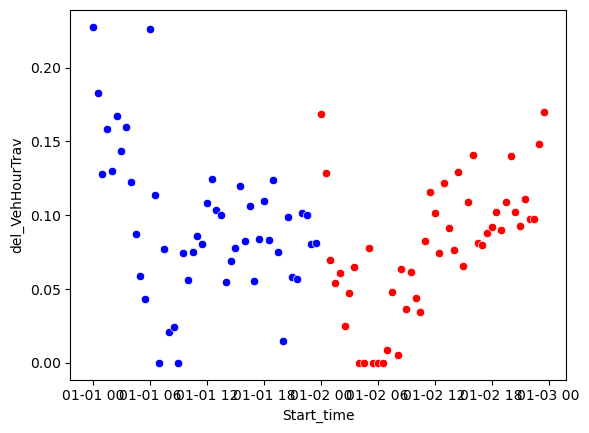

In [16]:
sns.scatterplot(x = df1_2.Start_time, y = df1_2.del_VehHourTrav, color='blue')
sns.scatterplot(x = df2_3.Start_time, y = df2_3.del_VehHourTrav, color='red')

<AxesSubplot:xlabel='Start_time', ylabel='del_VehHourTrav'>

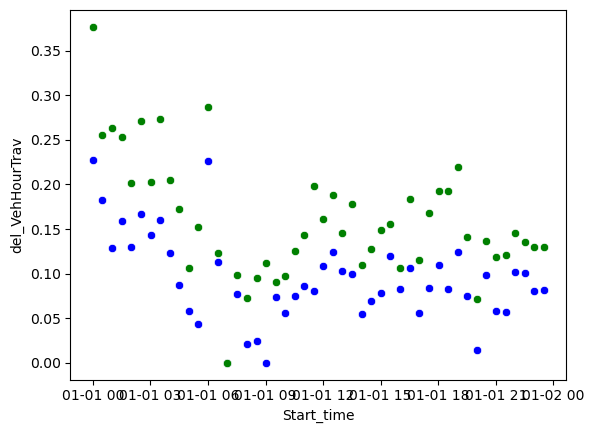

In [17]:
sns.scatterplot(x = df1_2.Start_time, y = df1_2.del_VehHourTrav, color='blue')
sns.scatterplot(x = df1_2_24.Start_time, y = df1_2_24.del_VehHourTrav, color='green')

In [18]:
'2016-01-02 00:00:00'

'2016-01-02 00:00:00'

In [19]:
df.columns

Index(['VehHourTrav', 'VehHourTrav_ns', 'PassHourTrav', 'PassHourTrav_ns',
       'PassUtility', 'PassUtility_ns', 'mean_lambda', 'revenue_s',
       'revenue_ns', 'Fare_Discount', 'nR', 'SINGLE', 'PAIRS', 'TRIPLES',
       'QUADRIPLES', 'QUINTETS', 'PLUS5', 'shared_ratio',
       'fleet_size_nonshared', 'fleet_size_shared', 'lambda_shared', '_typ',
       'dtype', 'Replication', 'Batch', 'shared_discount', 'Start_time',
       'End_time', 'Demand_size', 'del_VehHourTrav', 'del_PassUtility',
       'Occupancy', 'del_PassHourTrav'],
      dtype='object')

In [20]:
df.Start_time.dt.hour

0         0
1         0
2         0
3         0
4         0
         ..
25901    23
25902    23
25903    23
25904    23
25905    23
Name: Start_time, Length: 25906, dtype: int64

In [21]:
df.Start_time.dt.day

0         1
1         1
2         1
3         1
4         1
         ..
25901    30
25902    30
25903    30
25904    30
25905    30
Name: Start_time, Length: 25906, dtype: int64

In [22]:
df.Start_time.dt.dayofweek

0        4
1        4
2        4
3        4
4        4
        ..
25901    3
25902    3
25903    3
25904    3
25905    3
Name: Start_time, Length: 25906, dtype: int64

Text(0.5, 1.0, 'DEMAND')

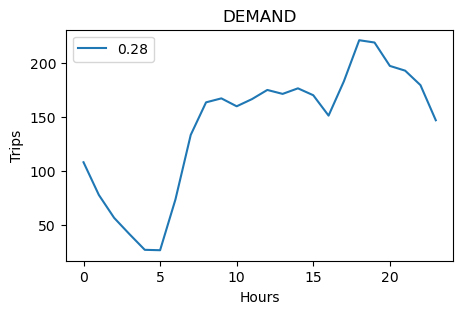

In [23]:
df[(df.shared_discount == 0.28)].groupby(df.Start_time.dt.hour).Demand_size.mean().plot(figsize=(5,3))
plt.legend(['0.28'])
plt.xlabel("Hours")
plt.ylabel("Trips")
plt.title("DEMAND")

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

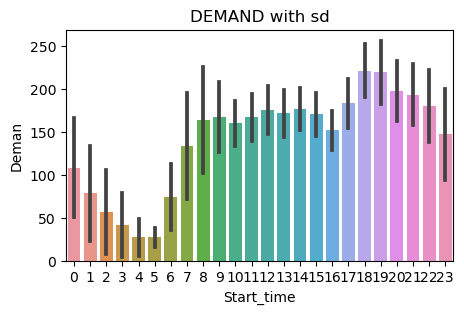

In [24]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4,5,6]) & (df.shared_discount == 0.28))]
fig, ax = plt.subplots(figsize=(5,3))
ax.set_title('DEMAND with sd')
sns.barplot(data = to_plot, x = df.Start_time.dt.hour, y="Demand_size", ax = ax, errorbar="sd")
plt.ylabel("Deman")
to_plot.Start_time.dt.dayofweek.unique()

Text(0.5, 1.0, 'DEMAND')

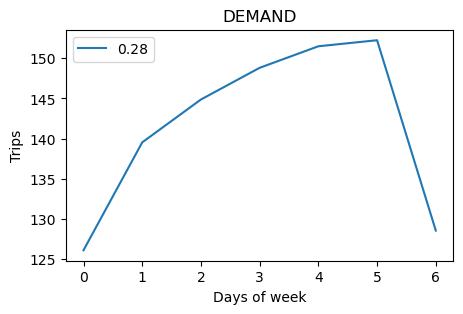

In [25]:
df[(df.shared_discount == 0.28)].groupby(df.Start_time.dt.dayofweek).Demand_size.mean().plot(figsize=(5,3))
plt.legend(['0.28'])
plt.xlabel("Days of week")
plt.ylabel("Trips")
plt.title("DEMAND")

Text(0.5, 1.0, 'DEMAND')

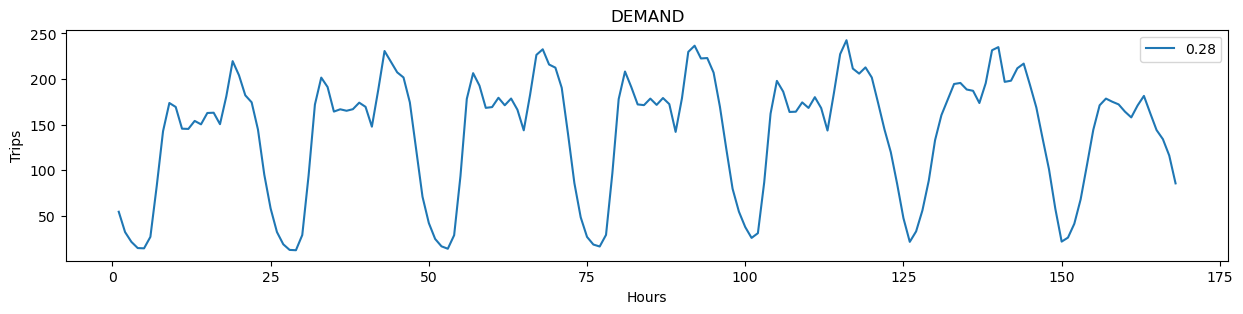

In [26]:
df[(df.shared_discount == 0.28)].groupby(df.Start_time.dt.dayofweek * 24 + (df.Start_time.dt.hour + 1)).Demand_size.mean().plot(figsize=(15,3))
plt.legend(['0.28'])
plt.xlabel("Hours")
plt.ylabel("Trips")
plt.title("DEMAND")

#df['date'].dt.dayofweek * 24 + (df['date'].dt.hour + 1)

Text(0.5, 1.0, 'WORKING DAY')

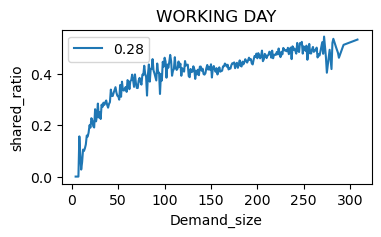

In [27]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])))) & (df.shared_discount == 0.28)].groupby(df.Demand_size).shared_ratio.mean().plot(figsize=(4,2))
plt.ylabel("shared_ratio")
plt.legend(['0.28'])
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

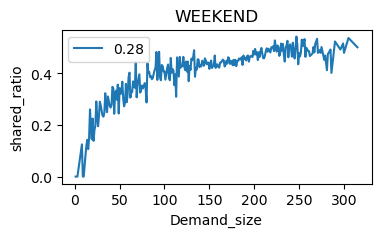

In [28]:
df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,4,5,6,7,8,9,10])))) & (df.shared_discount == 0.28)].groupby(df.Demand_size).shared_ratio.mean().plot(figsize=(4,2))
plt.ylabel("shared_ratio")
plt.legend(['0.28'])
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

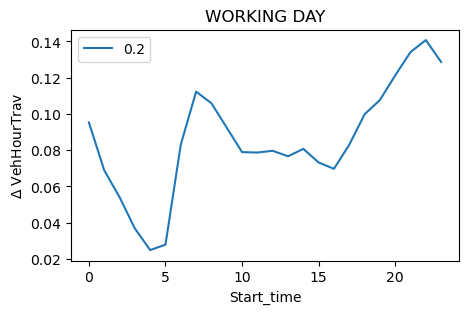

In [29]:
df[(df.Start_time.dt.dayofweek<5) & (df.shared_discount == 0.2)].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(figsize=(5,3))
plt.ylabel("$\Delta$ VehHourTrav")
plt.legend(['0.2'])
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

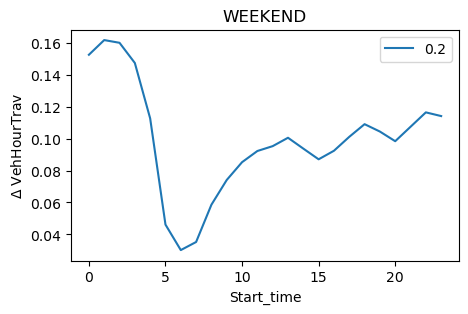

In [30]:
df[(df.Start_time.dt.dayofweek>=5) & (df.shared_discount == 0.2)].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(figsize=(5,3))
plt.ylabel("$\Delta$ VehHourTrav")
plt.legend(['0.2'])
plt.title("WEEKEND")

array([5, 6], dtype=int64)

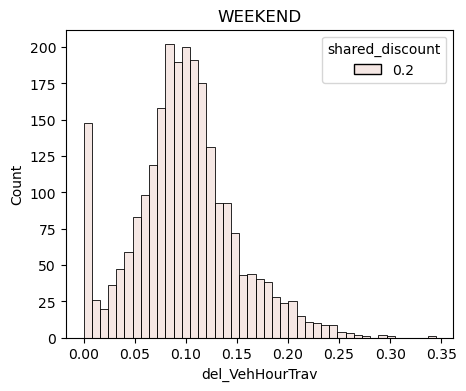

In [31]:
#to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.shared_discount == 0.2)]
#sns.displot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount')
#plt.title("WEEKEND")

to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.shared_discount == 0.2)]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WEEKEND')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()




Text(0.5, 1.0, 'WORKING DAY')

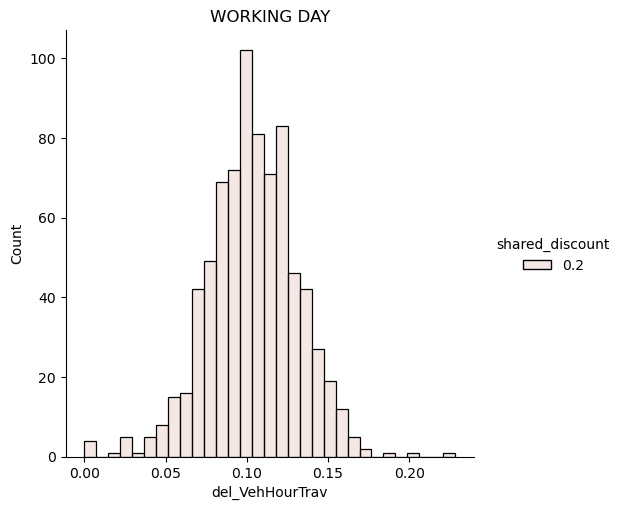

In [32]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & (df.shared_discount == 0.2) & ((df.Start_time.dt.hour<=9) & (df.Start_time.dt.hour>=7))]
sns.displot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount')
plt.title("WORKING DAY")

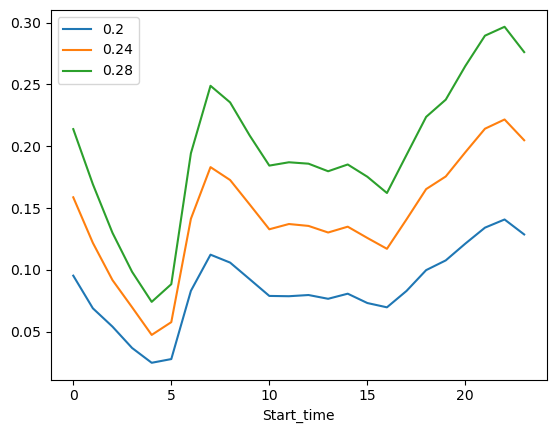

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for d in df.shared_discount.unique():
    df[(df.Start_time.dt.dayofweek<5) & (df.shared_discount == d)].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(ax = ax, label = d)
plt.legend()

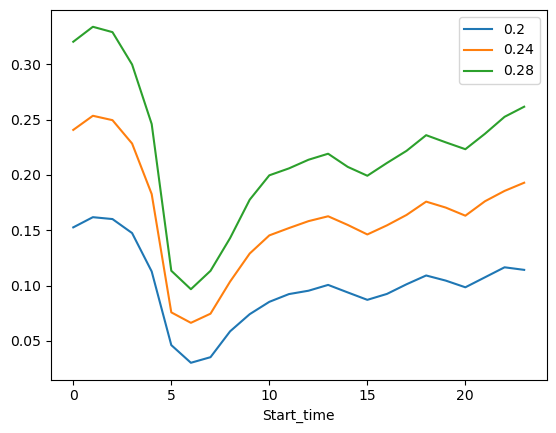

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for d in df.shared_discount.unique():
    df[(df.Start_time.dt.dayofweek>=5) & (df.shared_discount == d)].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(ax = ax, label = d)
plt.legend()

Text(0, 0.5, 'del_VehHourTrav')

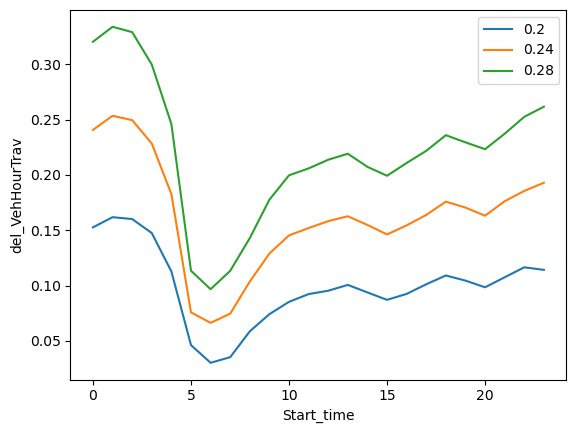

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for d in df.shared_discount.unique():
    df[(df.Start_time.dt.dayofweek>=5) & (df.shared_discount == d)].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(ax = ax, label = d)
plt.legend()
plt.ylabel("del_VehHourTrav")

Text(0.5, 1.0, 'WORKING DAY')

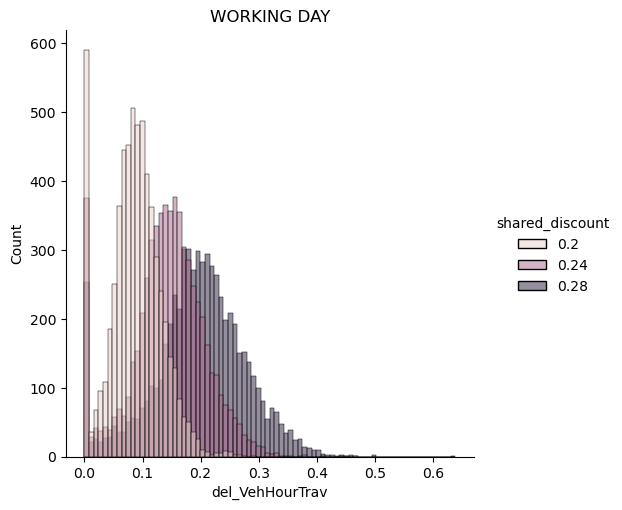

In [36]:
to_plot = df[(df.Start_time.dt.dayofweek<5)]
sns.displot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount')
plt.title("WORKING DAY")

In [37]:
df['del_PassHourTrav']=-((df['PassHourTrav_ns']-df['PassHourTrav'])/df['PassHourTrav'])

df

,VehHourTrav,VehHourTrav_ns,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,mean_lambda,revenue_s,revenue_ns,Fare_Discount,...,Replication,Batch,shared_discount,Start_time,End_time,Demand_size,del_VehHourTrav,del_PassUtility,Occupancy,del_PassHourTrav
0,92970,114141,117411,114141,1407.676625,1427.5440,0.305817,136969.20,171211.5,-0.20,...,0,0,0.20,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.227719,0.014114,1.262891,0.027851
1,82898,114141,120049,114141,1392.810710,1427.5440,0.378822,130120.74,171211.5,-0.24,...,0,0,0.24,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.376885,0.024938,1.448153,0.049213
2,79241,114141,122852,114141,1380.820575,1427.5440,0.396498,123272.28,171211.5,-0.28,...,0,0,0.28,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.440429,0.033837,1.550359,0.070906
3,112058,132553,134915,132553,1634.817525,1657.8305,0.287076,159063.60,198829.5,-0.20,...,0,1,0.20,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.182896,0.014077,1.203975,0.017507
4,105589,132553,137754,132553,1613.657885,1657.8305,0.294371,151110.42,198829.5,-0.24,...,0,1,0.24,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.255368,0.027374,1.304625,0.037756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25901,81563,99765,103560,99765,1215.942735,1247.7390,0.267898,113732.10,149647.5,-0.24,...,0,8711,0.24,2016-06-30 23:00:05,2016-06-30 23:29:41,181,0.223165,0.026149,1.269693,0.036645
25902,76707,99765,104919,99765,1207.303570,1247.7390,0.338975,107746.20,149647.5,-0.28,...,0,8711,0.28,2016-06-30 23:00:05,2016-06-30 23:29:41,181,0.300598,0.033492,1.367789,0.049124
25903,72772,79742,81289,79742,989.600950,997.2970,0.220175,95690.40,119613.0,-0.20,...,0,8712,0.20,2016-06-30 23:30:04,2016-06-30 23:59:37,150,0.095779,0.007777,1.117037,0.019031
25904,67393,79742,83147,79742,976.086920,997.2970,0.254399,90905.88,119613.0,-0.24,...,0,8712,0.24,2016-06-30 23:30:04,2016-06-30 23:59:37,150,0.183239,0.021730,1.233763,0.040952


In [38]:
df['del_PassUtility']=abs((df['PassUtility_ns']-df['PassUtility'])/df['PassUtility'])

df

,VehHourTrav,VehHourTrav_ns,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,mean_lambda,revenue_s,revenue_ns,Fare_Discount,...,Replication,Batch,shared_discount,Start_time,End_time,Demand_size,del_VehHourTrav,del_PassUtility,Occupancy,del_PassHourTrav
0,92970,114141,117411,114141,1407.676625,1427.5440,0.305817,136969.20,171211.5,-0.20,...,0,0,0.20,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.227719,0.014114,1.262891,0.027851
1,82898,114141,120049,114141,1392.810710,1427.5440,0.378822,130120.74,171211.5,-0.24,...,0,0,0.24,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.376885,0.024938,1.448153,0.049213
2,79241,114141,122852,114141,1380.820575,1427.5440,0.396498,123272.28,171211.5,-0.28,...,0,0,0.28,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.440429,0.033837,1.550359,0.070906
3,112058,132553,134915,132553,1634.817525,1657.8305,0.287076,159063.60,198829.5,-0.20,...,0,1,0.20,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.182896,0.014077,1.203975,0.017507
4,105589,132553,137754,132553,1613.657885,1657.8305,0.294371,151110.42,198829.5,-0.24,...,0,1,0.24,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.255368,0.027374,1.304625,0.037756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25901,81563,99765,103560,99765,1215.942735,1247.7390,0.267898,113732.10,149647.5,-0.24,...,0,8711,0.24,2016-06-30 23:00:05,2016-06-30 23:29:41,181,0.223165,0.026149,1.269693,0.036645
25902,76707,99765,104919,99765,1207.303570,1247.7390,0.338975,107746.20,149647.5,-0.28,...,0,8711,0.28,2016-06-30 23:00:05,2016-06-30 23:29:41,181,0.300598,0.033492,1.367789,0.049124
25903,72772,79742,81289,79742,989.600950,997.2970,0.220175,95690.40,119613.0,-0.20,...,0,8712,0.20,2016-06-30 23:30:04,2016-06-30 23:59:37,150,0.095779,0.007777,1.117037,0.019031
25904,67393,79742,83147,79742,976.086920,997.2970,0.254399,90905.88,119613.0,-0.24,...,0,8712,0.24,2016-06-30 23:30:04,2016-06-30 23:59:37,150,0.183239,0.021730,1.233763,0.040952


In [39]:
df['Occupancy']=df['PassHourTrav']/df['VehHourTrav']

df

,VehHourTrav,VehHourTrav_ns,PassHourTrav,PassHourTrav_ns,PassUtility,PassUtility_ns,mean_lambda,revenue_s,revenue_ns,Fare_Discount,...,Replication,Batch,shared_discount,Start_time,End_time,Demand_size,del_VehHourTrav,del_PassUtility,Occupancy,del_PassHourTrav
0,92970,114141,117411,114141,1407.676625,1427.5440,0.305817,136969.20,171211.5,-0.20,...,0,0,0.20,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.227719,0.014114,1.262891,0.027851
1,82898,114141,120049,114141,1392.810710,1427.5440,0.378822,130120.74,171211.5,-0.24,...,0,0,0.24,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.376885,0.024938,1.448153,0.049213
2,79241,114141,122852,114141,1380.820575,1427.5440,0.396498,123272.28,171211.5,-0.28,...,0,0,0.28,2016-01-01 00:00:17,2016-01-01 00:29:45,198,0.440429,0.033837,1.550359,0.070906
3,112058,132553,134915,132553,1634.817525,1657.8305,0.287076,159063.60,198829.5,-0.20,...,0,1,0.20,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.182896,0.014077,1.203975,0.017507
4,105589,132553,137754,132553,1613.657885,1657.8305,0.294371,151110.42,198829.5,-0.24,...,0,1,0.24,2016-01-01 00:30:04,2016-01-01 00:59:48,246,0.255368,0.027374,1.304625,0.037756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25901,81563,99765,103560,99765,1215.942735,1247.7390,0.267898,113732.10,149647.5,-0.24,...,0,8711,0.24,2016-06-30 23:00:05,2016-06-30 23:29:41,181,0.223165,0.026149,1.269693,0.036645
25902,76707,99765,104919,99765,1207.303570,1247.7390,0.338975,107746.20,149647.5,-0.28,...,0,8711,0.28,2016-06-30 23:00:05,2016-06-30 23:29:41,181,0.300598,0.033492,1.367789,0.049124
25903,72772,79742,81289,79742,989.600950,997.2970,0.220175,95690.40,119613.0,-0.20,...,0,8712,0.20,2016-06-30 23:30:04,2016-06-30 23:59:37,150,0.095779,0.007777,1.117037,0.019031
25904,67393,79742,83147,79742,976.086920,997.2970,0.254399,90905.88,119613.0,-0.24,...,0,8712,0.24,2016-06-30 23:30:04,2016-06-30 23:59:37,150,0.183239,0.021730,1.233763,0.040952


In [40]:
df.columns


Index(['VehHourTrav', 'VehHourTrav_ns', 'PassHourTrav', 'PassHourTrav_ns',
       'PassUtility', 'PassUtility_ns', 'mean_lambda', 'revenue_s',
       'revenue_ns', 'Fare_Discount', 'nR', 'SINGLE', 'PAIRS', 'TRIPLES',
       'QUADRIPLES', 'QUINTETS', 'PLUS5', 'shared_ratio',
       'fleet_size_nonshared', 'fleet_size_shared', 'lambda_shared', '_typ',
       'dtype', 'Replication', 'Batch', 'shared_discount', 'Start_time',
       'End_time', 'Demand_size', 'del_VehHourTrav', 'del_PassUtility',
       'Occupancy', 'del_PassHourTrav'],
      dtype='object')

Text(0.5, 1.0, 'WORKING DAY')

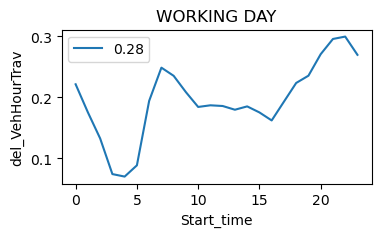

In [41]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])))) & (df.shared_discount == 0.28)].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(figsize=(4,2))
plt.ylabel("del_VehHourTrav")
plt.legend(['0.28'])
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

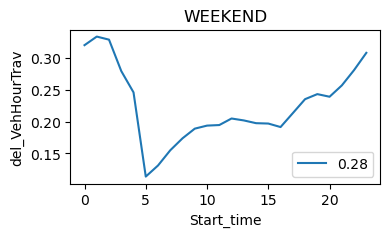

In [42]:
df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,4,5,6,7,8,9,10])))) & (df.shared_discount == 0.28)].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(figsize=(4,2))
plt.ylabel("del_VehHourTrav")
plt.legend(['0.28'])
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

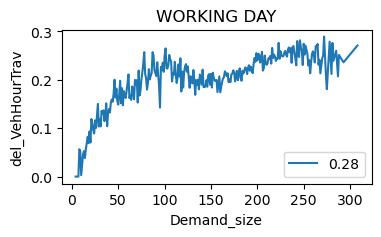

In [43]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])))) & (df.shared_discount == 0.28)].groupby(df.Demand_size).del_VehHourTrav.mean().plot(figsize=(4,2))
plt.ylabel("del_VehHourTrav")
plt.legend(['0.28'])
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

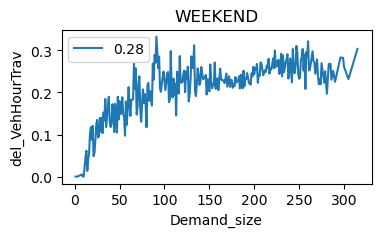

In [44]:
df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,4,5,6,7,8,9,10])))) & (df.shared_discount == 0.28)].groupby(df.Demand_size).del_VehHourTrav.mean().plot(figsize=(4,2))
plt.ylabel("del_VehHourTrav")
plt.legend(['0.28'])
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

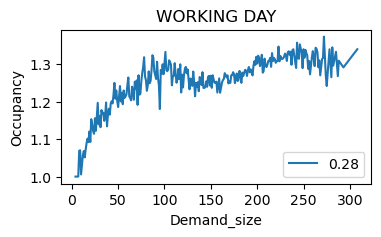

In [45]:
df[(df.Start_time.dt.dayofweek.isin([1,2,3]) | ((df.Start_time.dt.dayofweek.isin([0])) & (df.Start_time.dt.hour.isin([5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])))) & (df.shared_discount == 0.28)].groupby(df.Demand_size).Occupancy.mean().plot(figsize=(4,2))
plt.ylabel("Occupancy")
plt.legend(['0.28'])
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

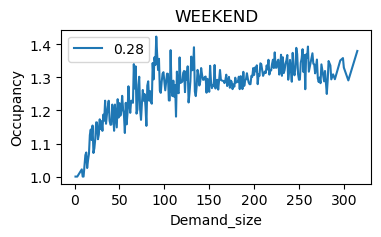

In [46]:
df[(df.Start_time.dt.dayofweek.isin([5]) | ((df.Start_time.dt.dayofweek.isin([4])) & (df.Start_time.dt.hour.isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]))) | ((df.Start_time.dt.dayofweek.isin([6])) & (df.Start_time.dt.hour.isin([0,1,2,4,5,6,7,8,9,10])))) & (df.shared_discount == 0.28)].groupby(df.Demand_size).Occupancy.mean().plot(figsize=(4,2))
plt.ylabel("Occupancy")
plt.legend(['0.28'])
plt.title("WEEKEND")

array([4, 0, 1, 2, 3], dtype=int64)

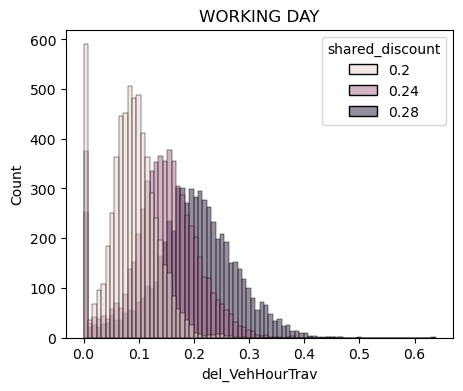

In [47]:
#to_plot = df[(df.Start_time.dt.dayofweek<5)]
#sns.displot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount')

to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WORKING DAY')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount', ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

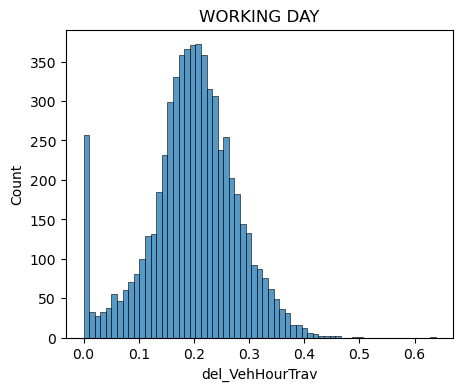

In [48]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.shared_discount == 0.28)]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WORKING DAY')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

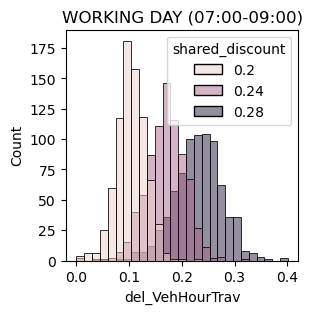

In [49]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (07:00-09:00)')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

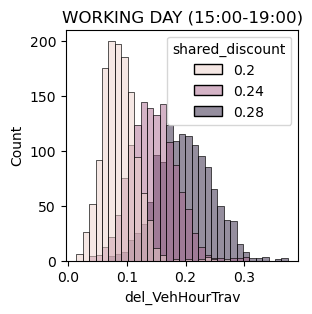

In [50]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (15:00-19:00)')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

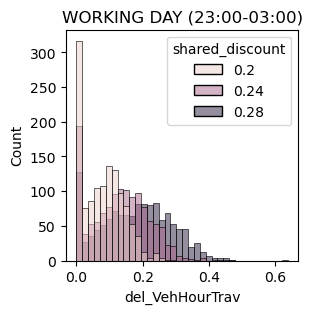

In [51]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([0,1,2,3,23]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (23:00-03:00)')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

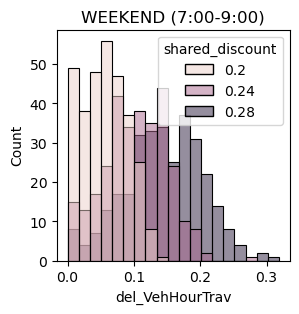

In [52]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (7:00-9:00)')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

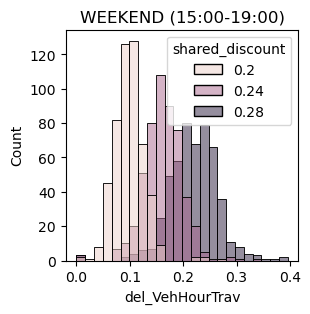

In [53]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (15:00-19:00)')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

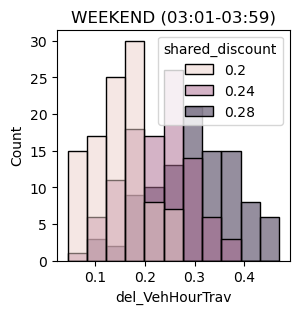

In [54]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (03:01-03:59)')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

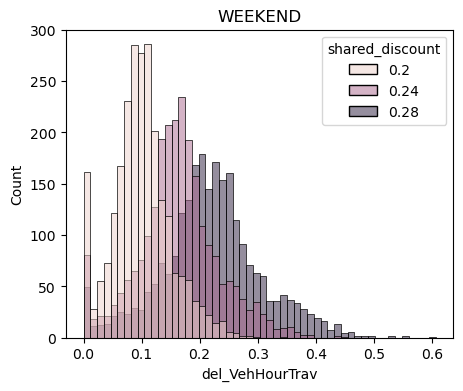

In [55]:
#to_plot = df[(df.Start_time.dt.dayofweek>=5)]
#sns.displot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount')

to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WEEKEND')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()


<AxesSubplot:title={'center':'SATURDAY NIGHT'}, xlabel='del_VehHourTrav', ylabel='Count'>

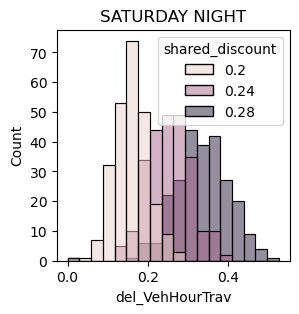

In [56]:
#saturday night
to_plot =df[((df.Start_time.dt.dayofweek==6) & (df.Start_time.dt.hour <=3)) |
  ((df.Start_time.dt.dayofweek==5) & (df.Start_time.dt.hour >=23))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('SATURDAY NIGHT')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)

<AxesSubplot:title={'center':'SUNDAY NIGHT'}, xlabel='del_VehHourTrav', ylabel='Count'>

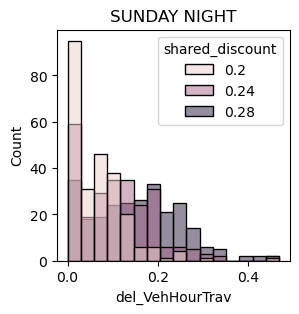

In [57]:
#sUNday night
to_plot =df[((df.Start_time.dt.dayofweek==0) & (df.Start_time.dt.hour <=3)) |
  ((df.Start_time.dt.dayofweek==6) & (df.Start_time.dt.hour >=23))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('SUNDAY NIGHT')
sns.histplot(data = to_plot, x = 'del_VehHourTrav', hue = 'shared_discount',ax = ax)

array([4, 0, 1, 2, 3], dtype=int64)

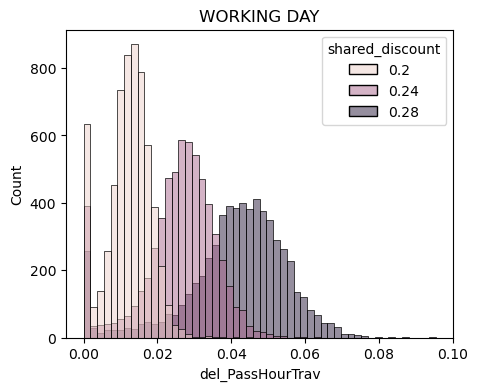

In [58]:
# = df[(df.Start_time.dt.dayofweek<5)]
#sns.displot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount')

to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WORKING DAY')
sns.histplot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

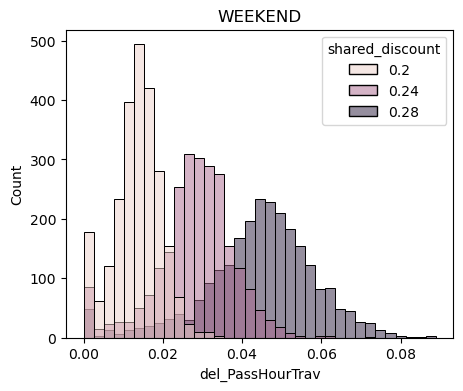

In [59]:
#to_plot = df[(df.Start_time.dt.dayofweek>=5)]
#sns.displot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount')

to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WEEKEND')
sns.histplot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

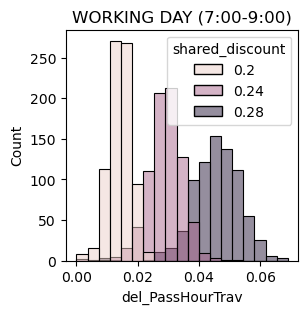

In [60]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (7:00-9:00)')
sns.histplot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

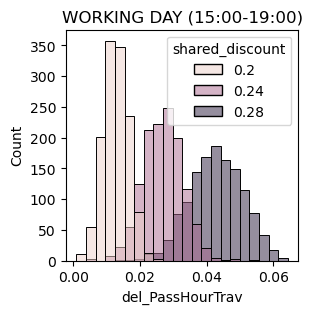

In [61]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (15:00-19:00)')
sns.histplot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

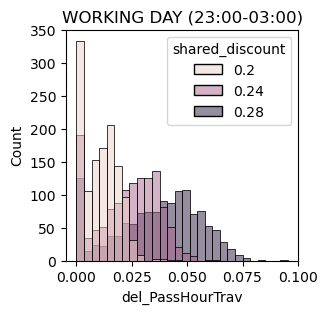

In [62]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (23:00-03:00)')
sns.histplot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

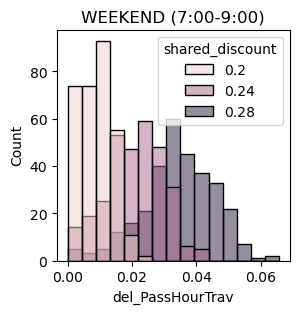

In [63]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (7:00-9:00)')
sns.histplot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

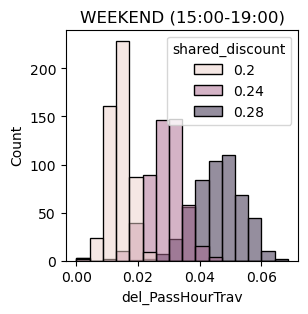

In [64]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (15:00-19:00)')
sns.histplot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

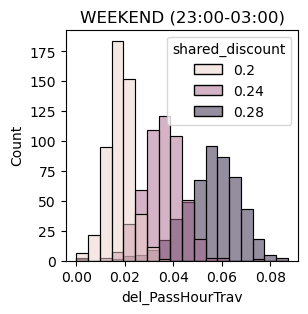

In [65]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (23:00-03:00)')
sns.histplot(data = to_plot, x = 'del_PassHourTrav', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

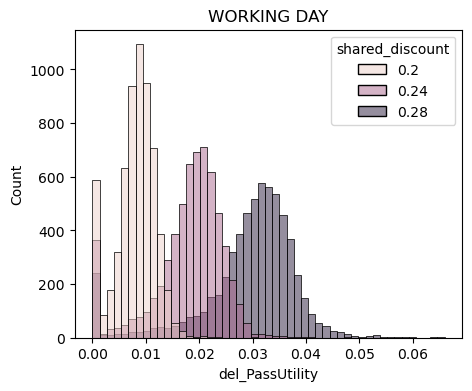

In [66]:
#to_plot = df[(df.Start_time.dt.dayofweek<5)]
#sns.displot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount')

to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WORKING DAY')
sns.histplot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

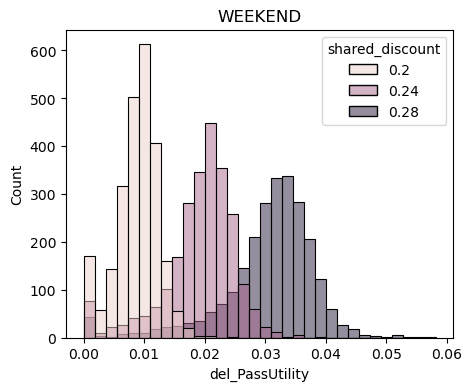

In [67]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WEEKEND')
sns.histplot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

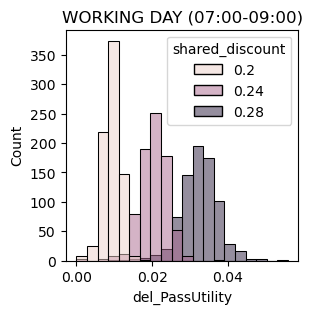

In [68]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (07:00-09:00)')
sns.histplot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

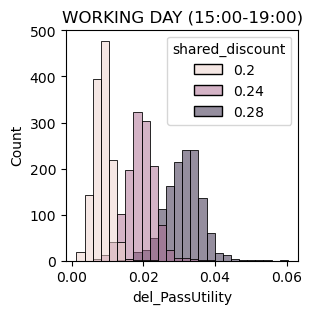

In [69]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (15:00-19:00)')
sns.histplot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

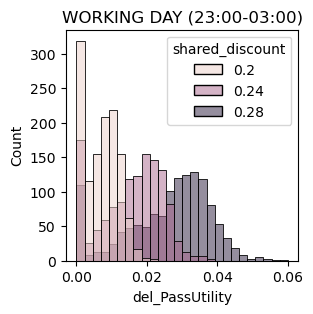

In [70]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (23:00-03:00)')
sns.histplot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

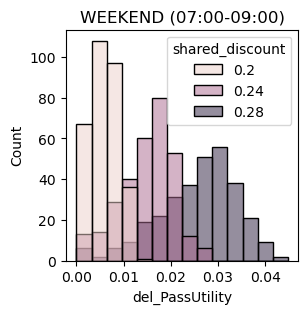

In [71]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (07:00-09:00)')
sns.histplot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

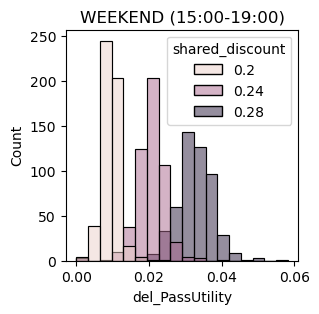

In [72]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (15:00-19:00)')
sns.histplot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

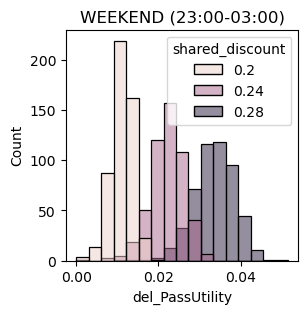

In [73]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (23:00-03:00)')
sns.histplot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

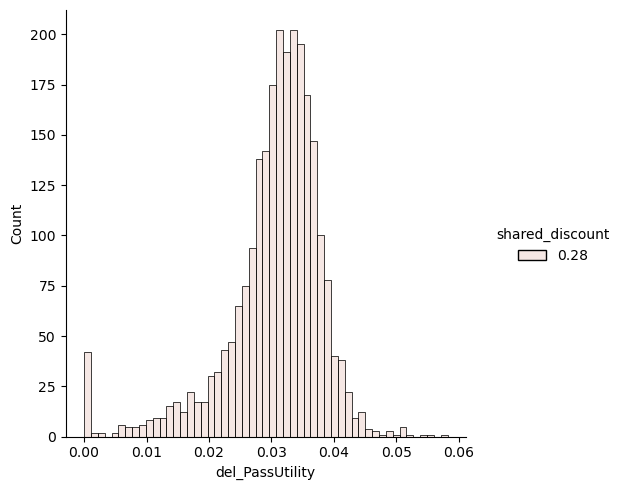

In [74]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.shared_discount == 0.28)]
sns.displot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount')

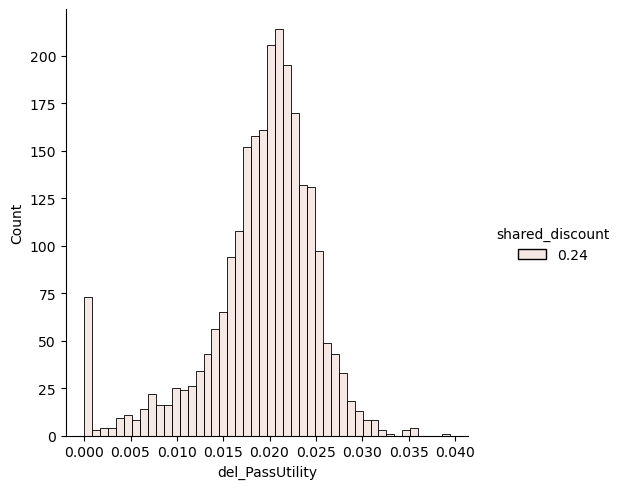

In [75]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.shared_discount == 0.24)]
sns.displot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount')

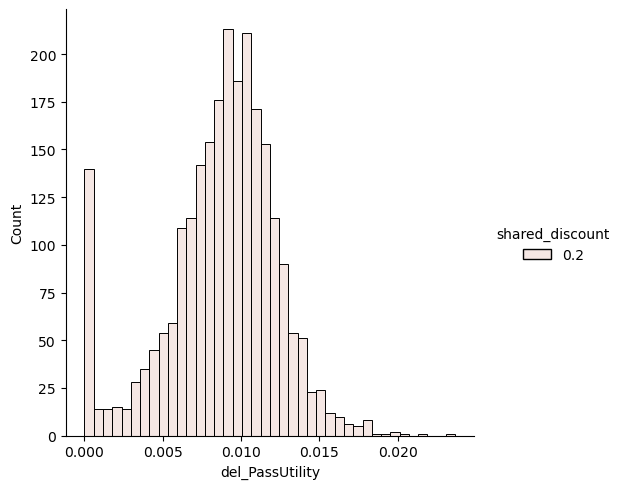

In [76]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.shared_discount == 0.2)]
sns.displot(data = to_plot, x = 'del_PassUtility', hue = 'shared_discount')

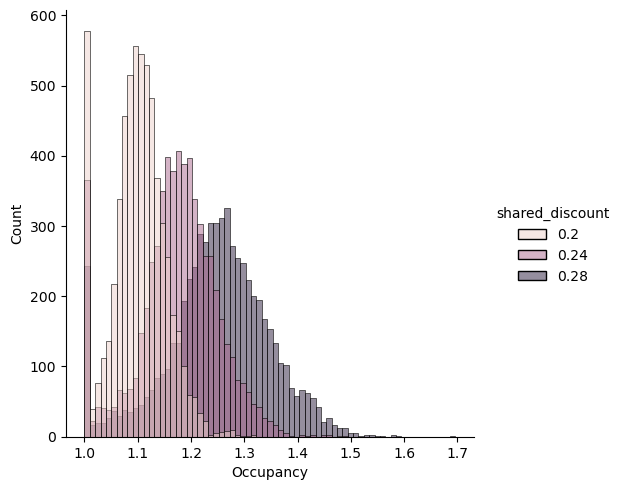

In [77]:
to_plot = df[(df.Start_time.dt.dayofweek<5)]
sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

array([4, 0, 1, 2, 3], dtype=int64)

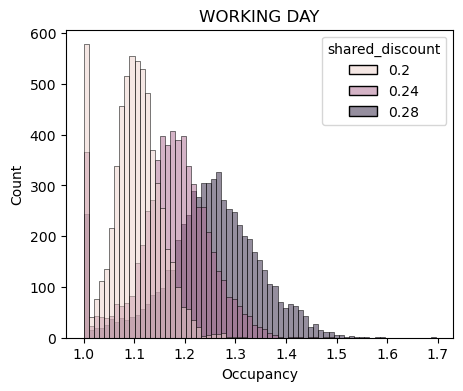

In [78]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WORKING DAY')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

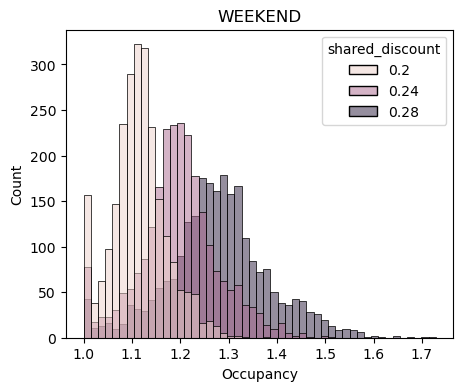

In [79]:
#to_plot = df[(df.Start_time.dt.dayofweek>=5)]
#sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WEEKEND')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

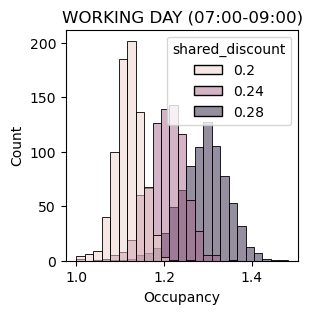

In [80]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (07:00-09:00)')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

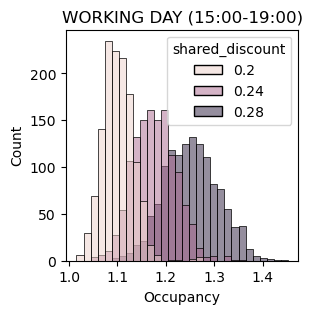

In [81]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (15:00-19:00)')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

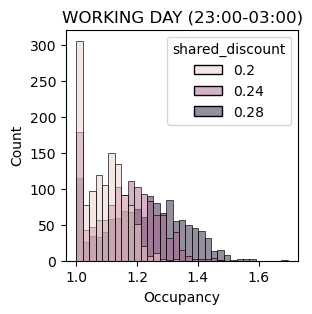

In [82]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (23:00-03:00)')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

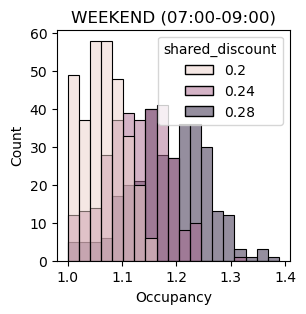

In [83]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (07:00-09:00)')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

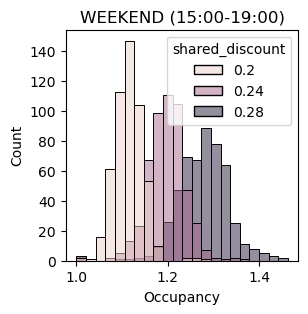

In [84]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (15:00-19:00)')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

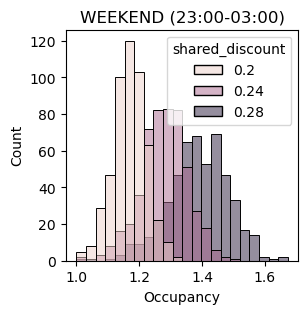

In [85]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (23:00-03:00)')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

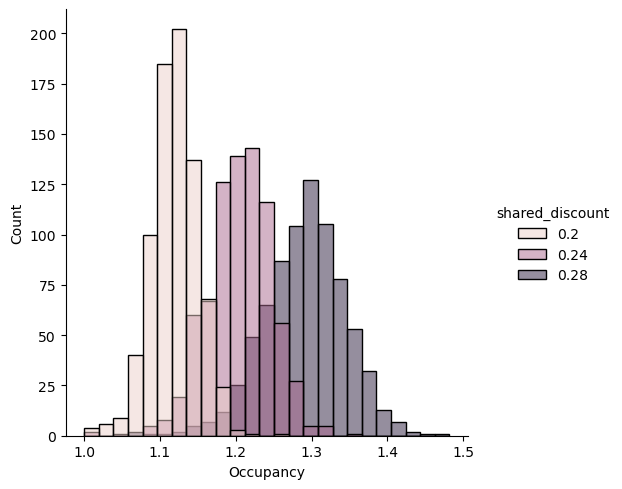

In [86]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & (df.Start_time.dt.hour<=9) & (df.Start_time.dt.hour>=7)]

sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

array([4, 0, 1, 2, 3], dtype=int64)

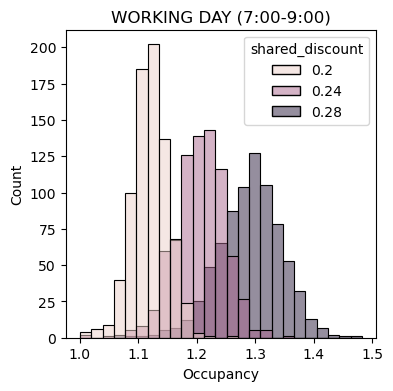

In [87]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('WORKING DAY (7:00-9:00)')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()


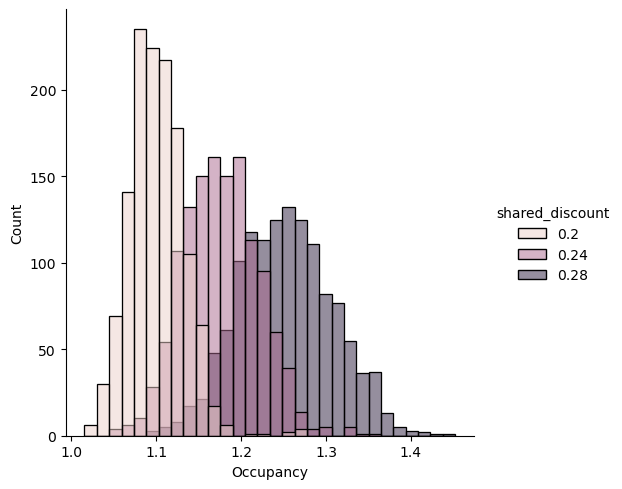

In [88]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & (df.Start_time.dt.hour<=19) & (df.Start_time.dt.hour>=15)]

sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

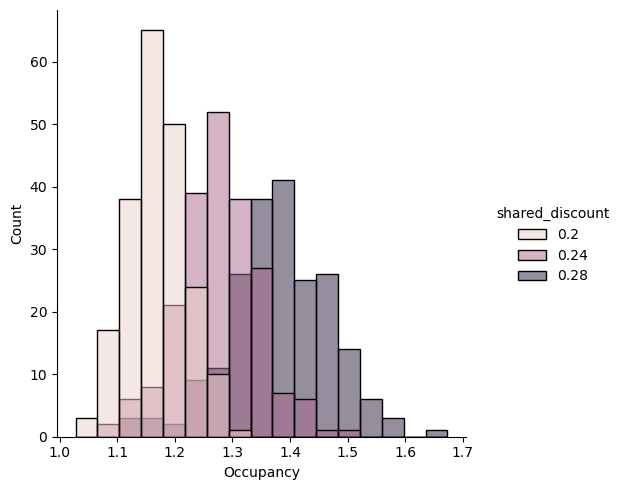

In [89]:
to_plot = df[(df.Start_time.dt.dayofweek==5) & ((df.Start_time.dt.hour >23) | (df.Start_time.dt.hour <=3))]

sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

<AxesSubplot:title={'center':'saturday night'}, xlabel='Occupancy', ylabel='Count'>

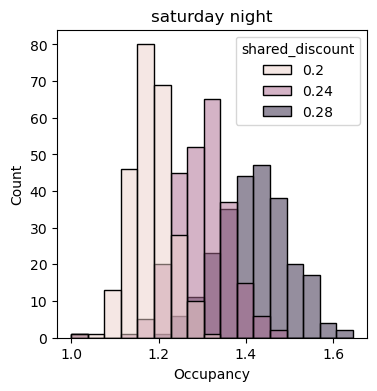

In [90]:
#saturday night
to_plot =df[((df.Start_time.dt.dayofweek==6) & (df.Start_time.dt.hour <=3)) |
  ((df.Start_time.dt.dayofweek==5) & (df.Start_time.dt.hour >=23))]
fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('saturday night')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)

<AxesSubplot:title={'center':'sunday night'}, xlabel='Occupancy', ylabel='Count'>

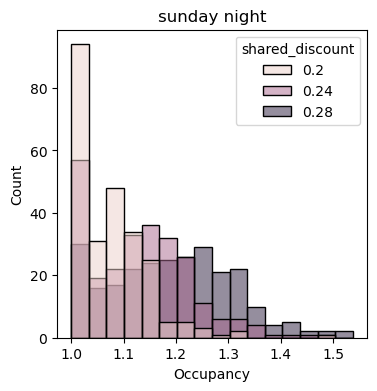

In [91]:
#sanday night
to_plot =df[((df.Start_time.dt.dayofweek==0) & (df.Start_time.dt.hour <=3)) |
  ((df.Start_time.dt.dayofweek==6) & (df.Start_time.dt.hour >=23))]
fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('sunday night')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)

array([1, 2, 3], dtype=int64)

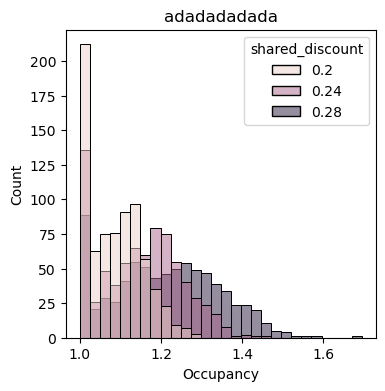

In [92]:
#saturday night
to_plot =df[(df.Start_time.dt.hour.isin([23,0,1,2,3])) & (df.Start_time.dt.dayofweek.isin([1,2,3]))]
fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('adadadadada')
sns.histplot(data = to_plot, x = 'Occupancy', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

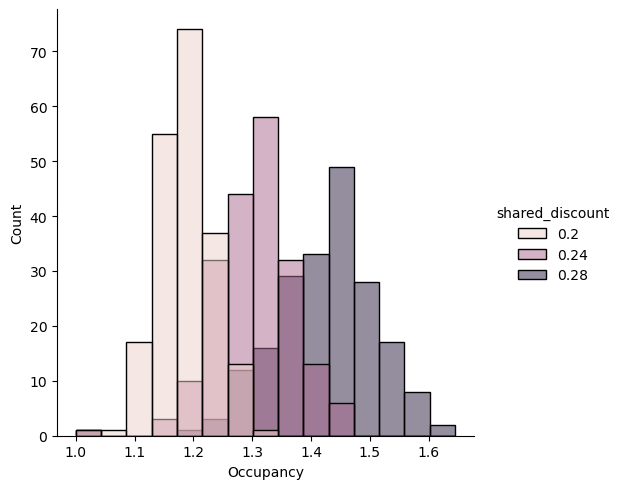

In [93]:
to_plot = df[(df.Start_time.dt.dayofweek==6) & ((df.Start_time.dt.hour >23) | (df.Start_time.dt.hour <=3))]

sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

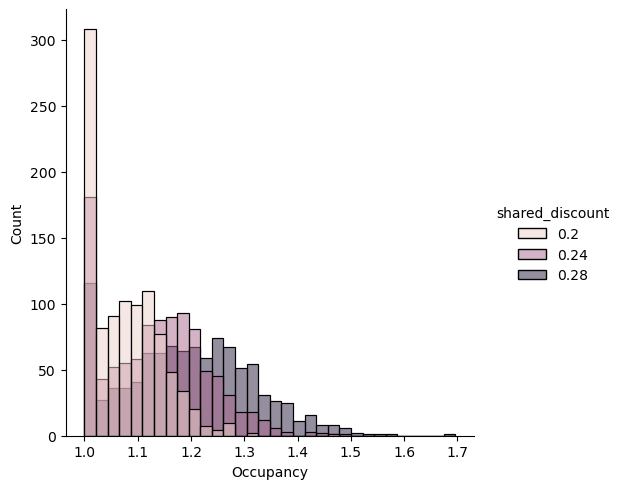

In [94]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & ((df.Start_time.dt.hour >23) | (df.Start_time.dt.hour <=3))]

sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

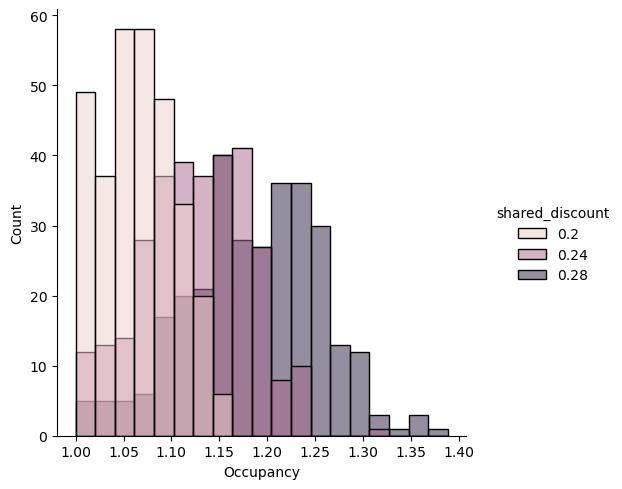

In [95]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.Start_time.dt.hour<=9) & (df.Start_time.dt.hour>=7)]

sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

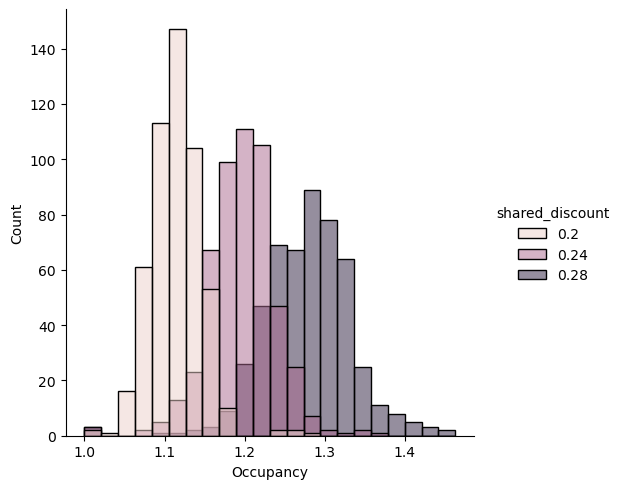

In [96]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.Start_time.dt.hour<=19) & (df.Start_time.dt.hour>=15)]

sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

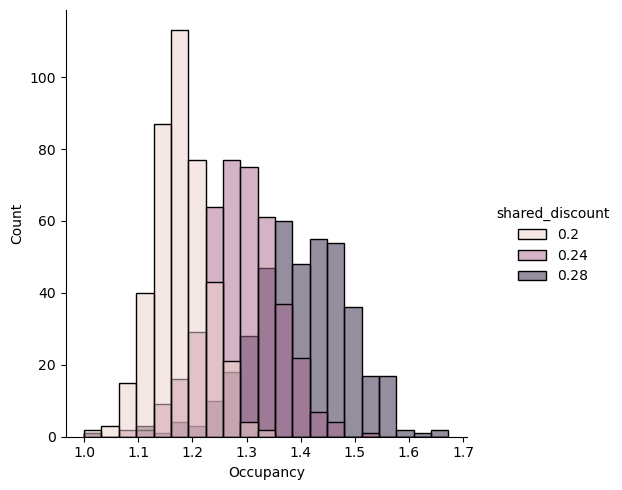

In [97]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & ((df.Start_time.dt.hour >23) | (df.Start_time.dt.hour <=3))]

sns.displot(data = to_plot, x = 'Occupancy', hue = 'shared_discount')

array([4, 0, 1, 2, 3], dtype=int64)

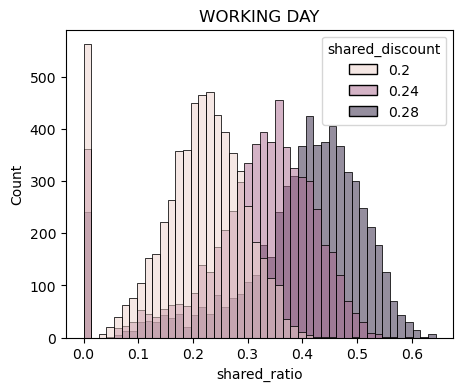

In [98]:
#to_plot = df[(df.Start_time.dt.dayofweek<5)]
#sns.displot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount')

to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WORKING DAY')
sns.histplot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

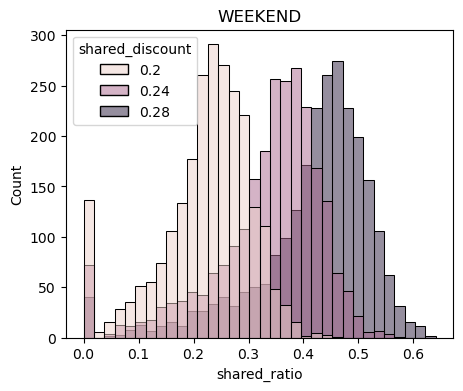

In [99]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WEEKEND')
sns.histplot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

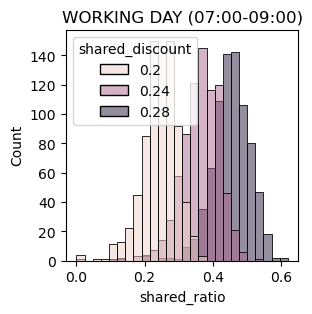

In [100]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (07:00-09:00)')
sns.histplot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

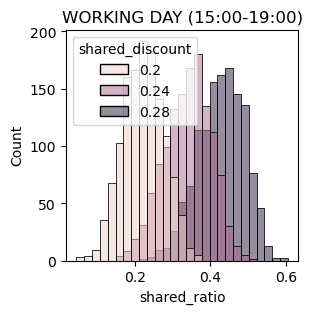

In [101]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (15:00-19:00)')
sns.histplot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

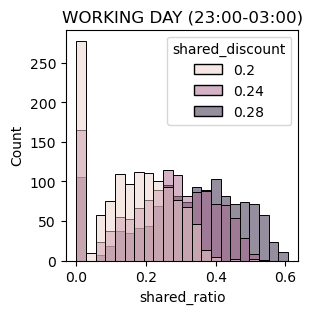

In [102]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (23:00-03:00)')
sns.histplot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

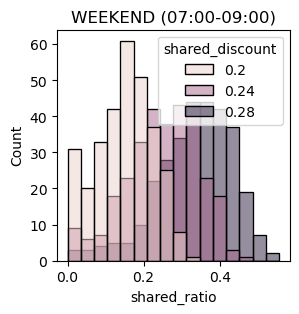

In [103]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (07:00-09:00)')
sns.histplot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

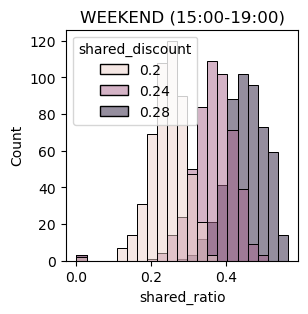

In [104]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (15:00-19:00)')
sns.histplot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

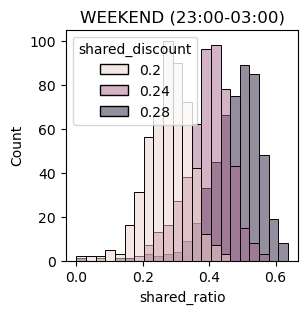

In [105]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (23:00-03:00)')
sns.histplot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

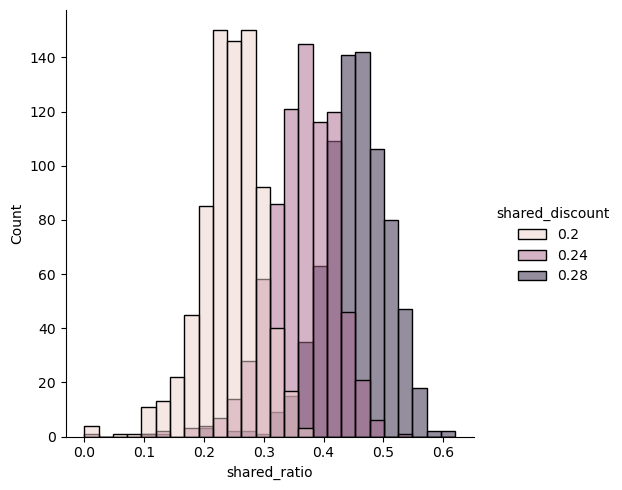

In [106]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & (df.Start_time.dt.hour<=9) & (df.Start_time.dt.hour>=7)]

sns.displot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount')

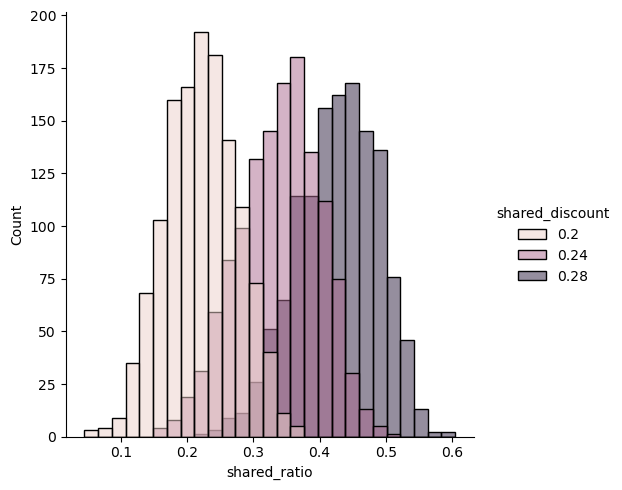

In [107]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & (df.Start_time.dt.hour<=19) & (df.Start_time.dt.hour>=15)]

sns.displot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount')

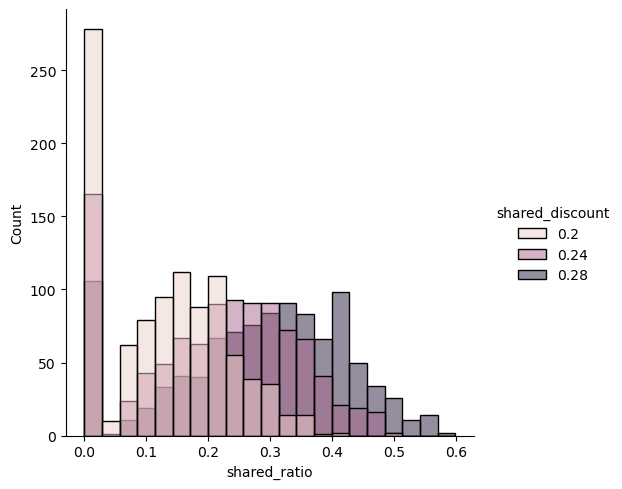

In [108]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & ((df.Start_time.dt.hour<=3) | (df.Start_time.dt.hour>23))]

sns.displot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount')

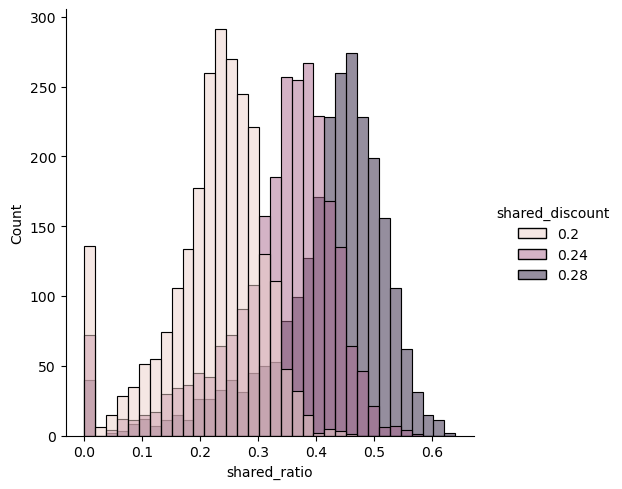

In [109]:
to_plot = df[(df.Start_time.dt.dayofweek>=5)]
sns.displot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount')

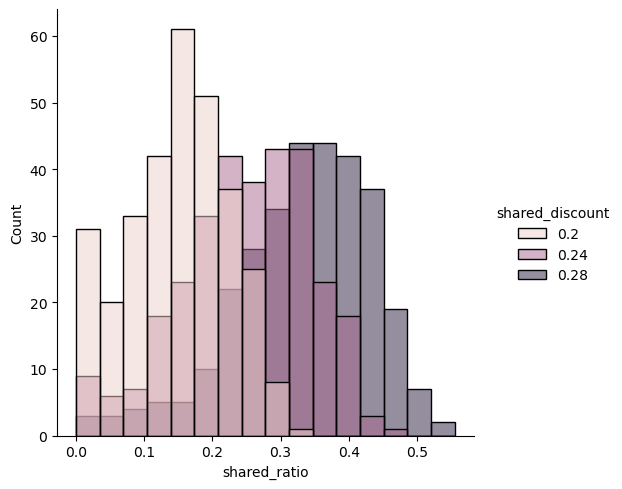

In [110]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.Start_time.dt.hour<=9) & (df.Start_time.dt.hour>=7)]

sns.displot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount')

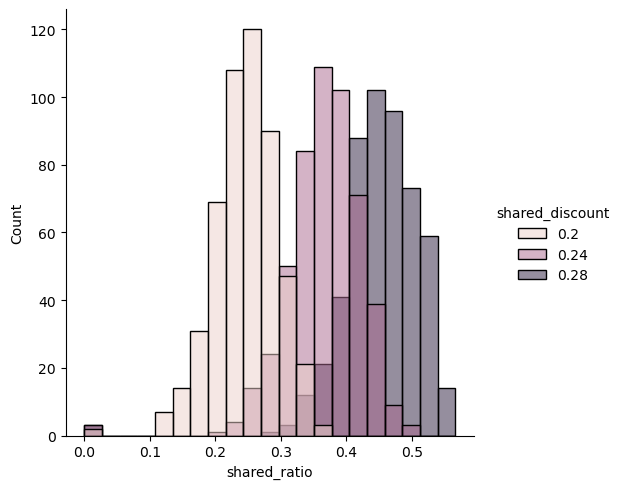

In [111]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.Start_time.dt.hour<=19) & (df.Start_time.dt.hour>=15)]

sns.displot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount')

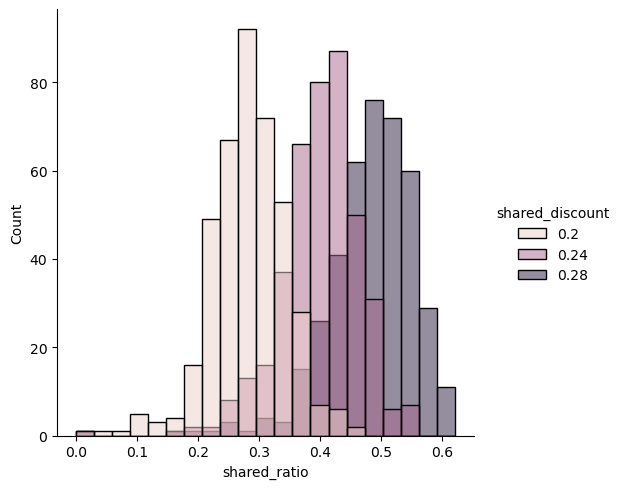

In [112]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & ((df.Start_time.dt.hour<=3) | (df.Start_time.dt.hour>23))]

sns.displot(data = to_plot, x = 'shared_ratio', hue = 'shared_discount')

array([4, 0, 1, 2, 3], dtype=int64)

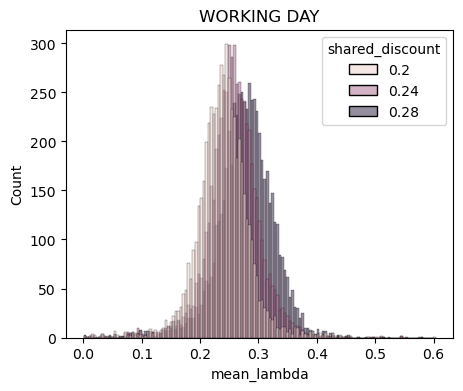

In [113]:
#to_plot = df[(df.Start_time.dt.dayofweek<5)]
#sns.displot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount')

to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WORKING DAY')
sns.histplot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

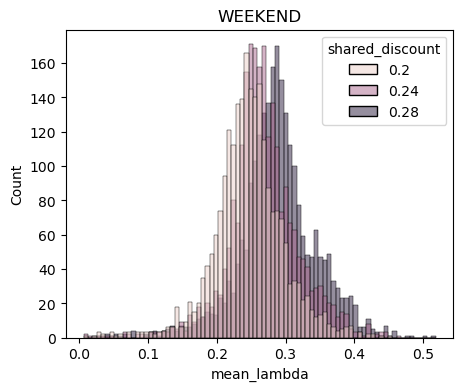

In [114]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6]))]
fig, ax = plt.subplots(figsize=(5,4))
ax.set_title('WEEKEND')
sns.histplot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

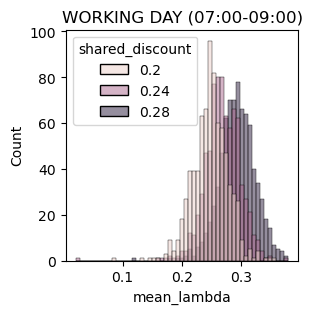

In [115]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (07:00-09:00)')
sns.histplot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

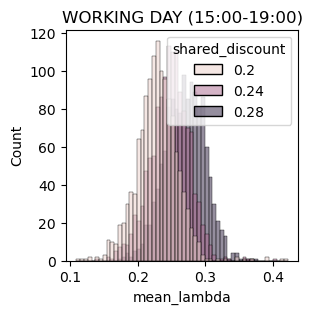

In [116]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (15:00-19:00)')
sns.histplot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([4, 0, 1, 2, 3], dtype=int64)

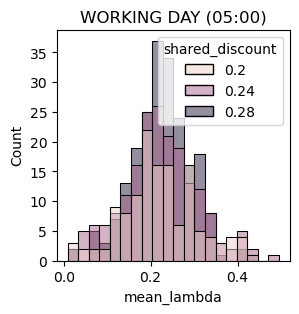

In [117]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.Start_time.dt.hour.isin([5]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WORKING DAY (05:00)')
sns.histplot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

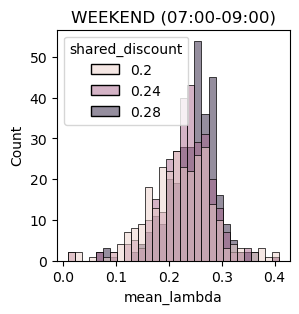

In [118]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([7,8,9]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (07:00-09:00)')
sns.histplot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

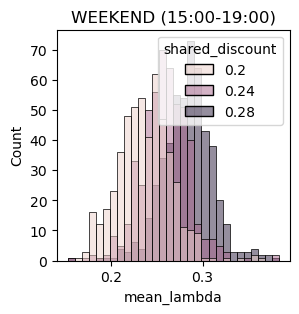

In [119]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([15,16,17,18,19]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (15:00-19:00)')
sns.histplot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

array([5, 6], dtype=int64)

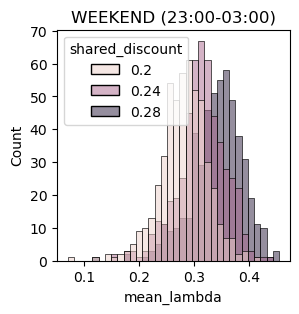

In [120]:
to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.Start_time.dt.hour.isin([23,0,1,2,3]))]
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('WEEKEND (23:00-03:00)')
sns.histplot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount',ax = ax)
to_plot.Start_time.dt.dayofweek.unique()

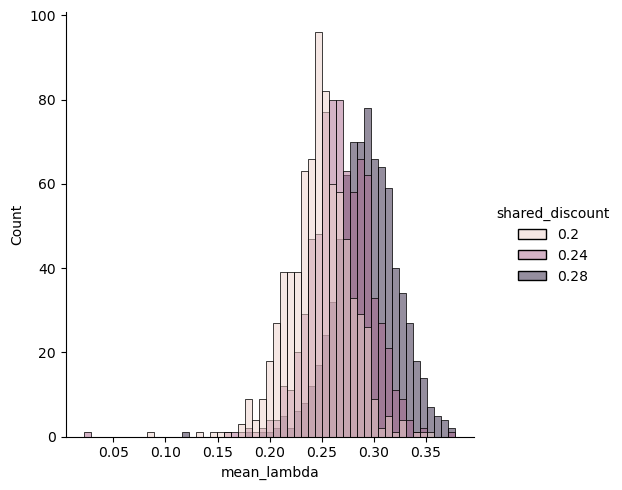

In [121]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & (df.Start_time.dt.hour<=9) & (df.Start_time.dt.hour>=7)]

sns.displot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount')

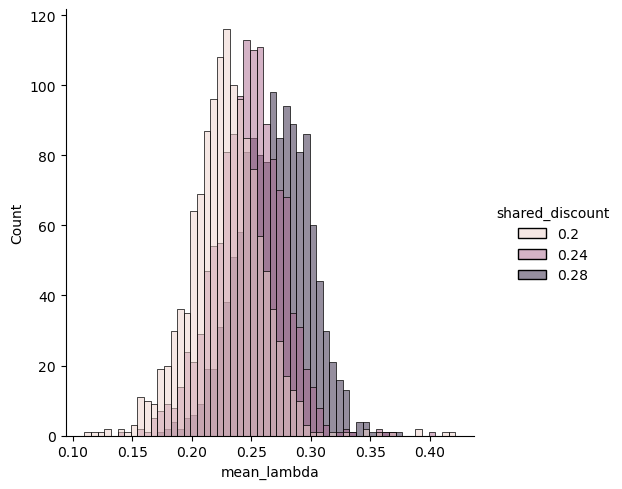

In [122]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & (df.Start_time.dt.hour<=19) & (df.Start_time.dt.hour>=15)]

sns.displot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount')

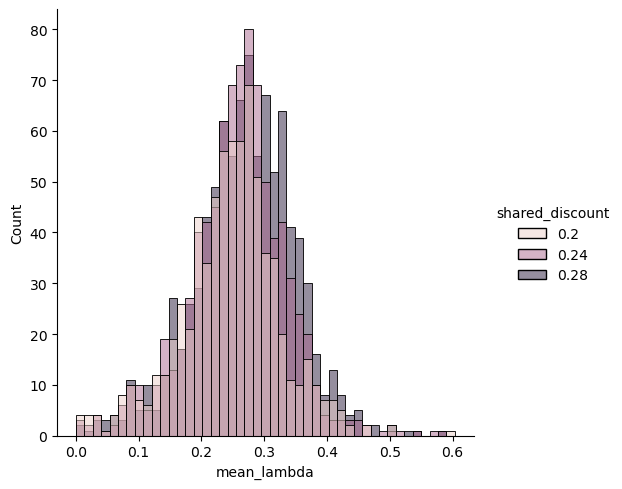

In [123]:
to_plot = df[(df.Start_time.dt.dayofweek<5) & ((df.Start_time.dt.hour<=3) | (df.Start_time.dt.hour>23))]

sns.displot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount')

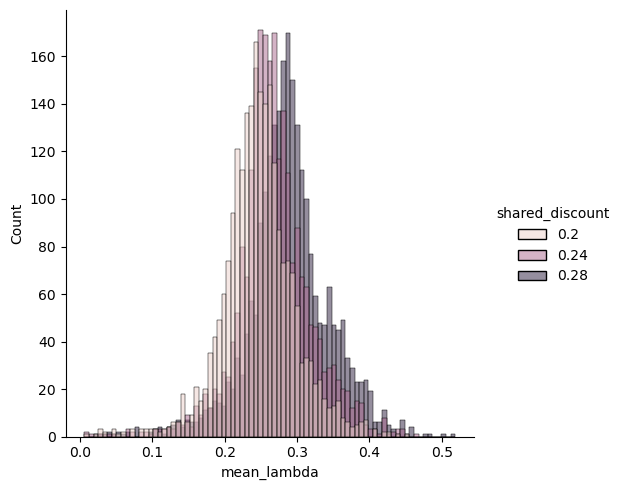

In [124]:
to_plot = df[(df.Start_time.dt.dayofweek>=5)]
sns.displot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount')

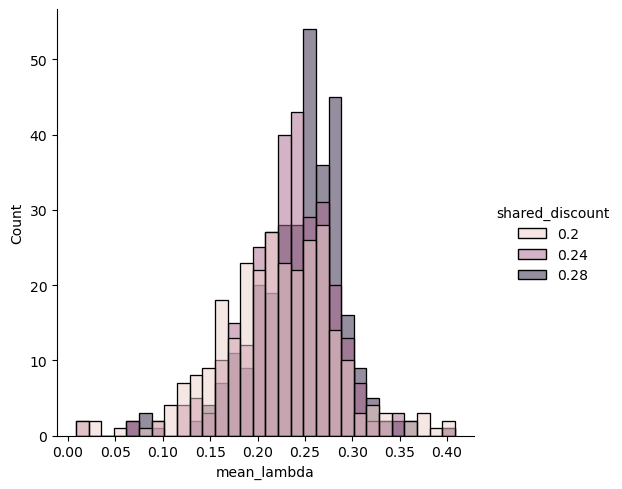

In [152]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.Start_time.dt.hour<=9) & (df.Start_time.dt.hour>=7)]

sns.displot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount')

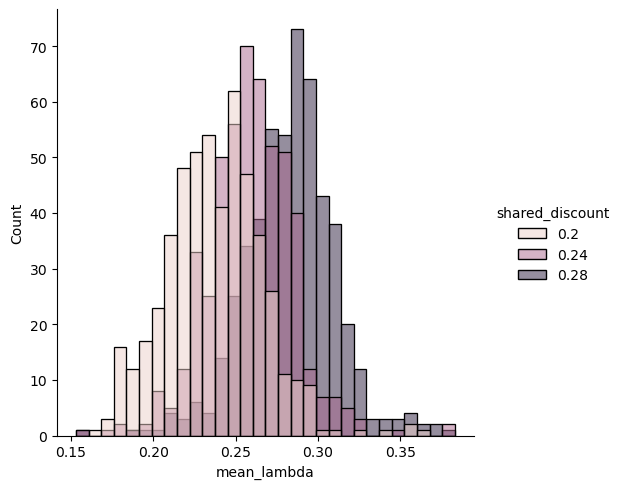

In [126]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.Start_time.dt.hour<=19) & (df.Start_time.dt.hour>=15)]

sns.displot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount')

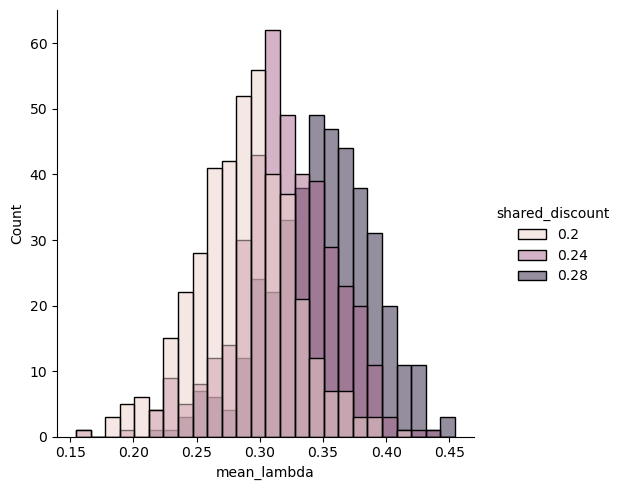

In [149]:
to_plot = df[(df.Start_time.dt.dayofweek>=5) & ((df.Start_time.dt.hour<=3) | (df.Start_time.dt.hour>23))]

sns.displot(data = to_plot, x = 'mean_lambda', hue = 'shared_discount')

Text(0, 0.5, '$\\Delta$ VehHourTrav')

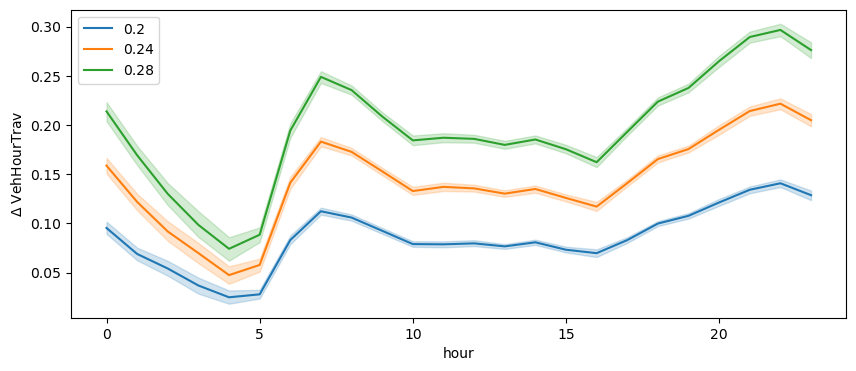

In [128]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,4))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek<5) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'del_VehHourTrav', ax = ax, label = d)
plt.legend()
plt.ylabel("$\Delta$ VehHourTrav") 

In [129]:
df.columns

Index(['VehHourTrav', 'VehHourTrav_ns', 'PassHourTrav', 'PassHourTrav_ns',
       'PassUtility', 'PassUtility_ns', 'mean_lambda', 'revenue_s',
       'revenue_ns', 'Fare_Discount', 'nR', 'SINGLE', 'PAIRS', 'TRIPLES',
       'QUADRIPLES', 'QUINTETS', 'PLUS5', 'shared_ratio',
       'fleet_size_nonshared', 'fleet_size_shared', 'lambda_shared', '_typ',
       'dtype', 'Replication', 'Batch', 'shared_discount', 'Start_time',
       'End_time', 'Demand_size', 'del_VehHourTrav', 'del_PassUtility',
       'Occupancy', 'del_PassHourTrav', 'hour'],
      dtype='object')

Text(0.5, 1.0, 'WORKING DAY')

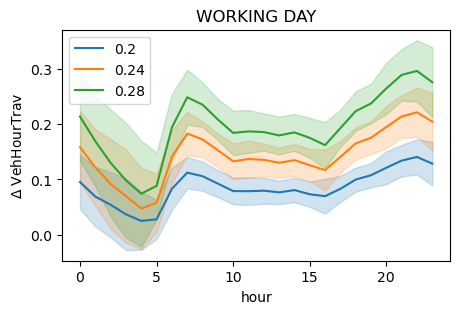

In [130]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'del_VehHourTrav', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("$\Delta$ VehHourTrav")
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

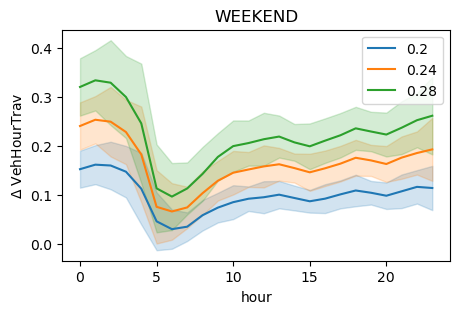

In [157]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'del_VehHourTrav', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("$\Delta$ VehHourTrav")
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

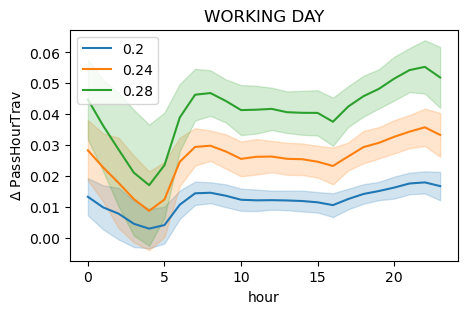

In [132]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'del_PassHourTrav', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("$\Delta$ PassHourTrav")
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

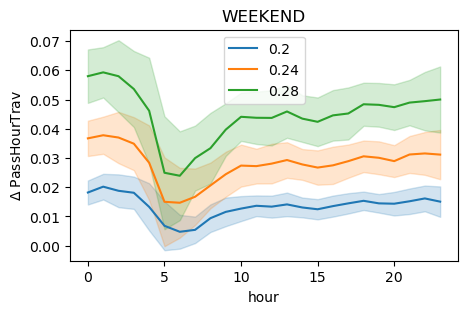

In [133]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'del_PassHourTrav', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("$\Delta$ PassHourTrav")
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

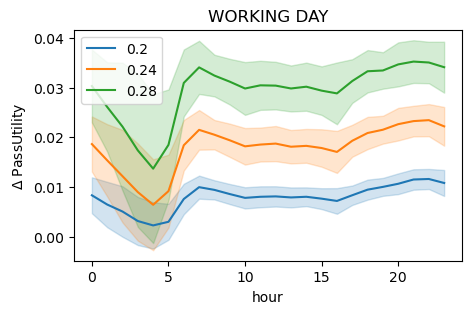

In [134]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'del_PassUtility', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("$\Delta$ PassUtility")
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

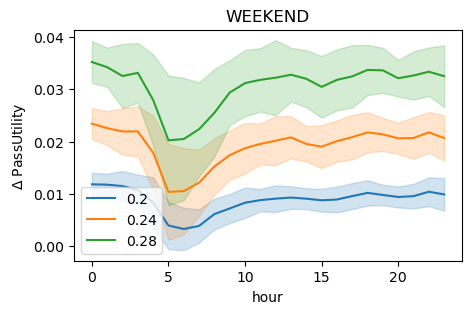

In [159]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'del_PassUtility', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("$\Delta$ PassUtility")
plt.title("WEEKEND")



Text(0.5, 1.0, 'WORKING DAY')

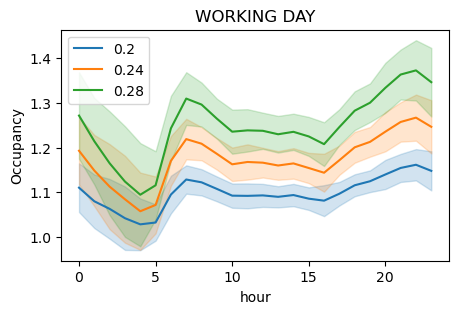

In [136]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'Occupancy', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("Occupancy")
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

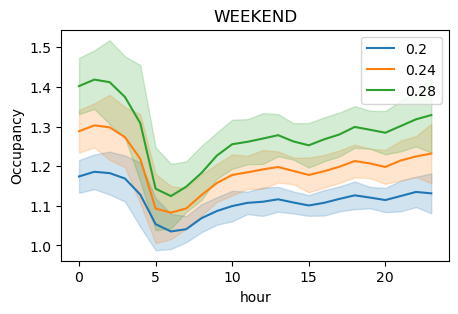

In [137]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'Occupancy', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("Occupancy")
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

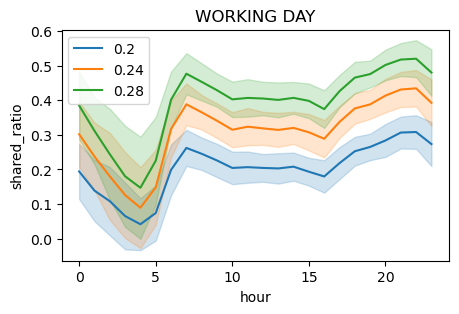

In [138]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'shared_ratio', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("shared_ratio")
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WEEKEND')

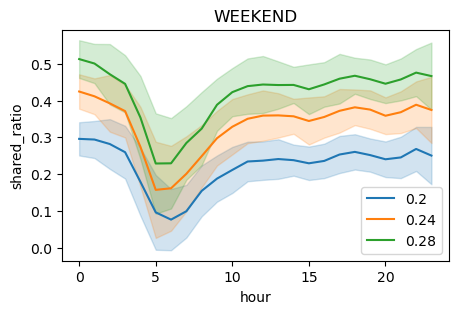

In [139]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'shared_ratio', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("shared_ratio")
plt.title("WEEKEND")

Text(0.5, 1.0, 'WORKING DAY')

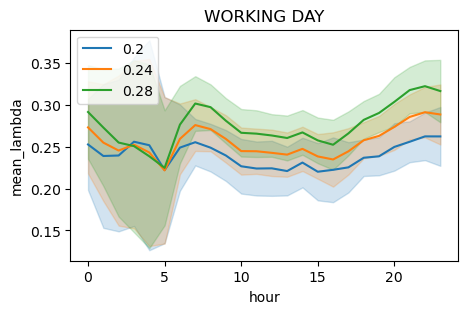

In [147]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'mean_lambda', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("mean_lambda")
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WORKING DAY')

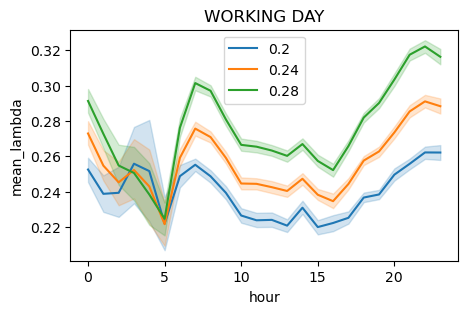

In [141]:
# sd "confidence interval"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'mean_lambda', ax = ax, label = d, errorbar ='ci')
plt.legend()
plt.ylabel("mean_lambda")
plt.title("WORKING DAY")

Text(0.5, 1.0, 'WORKING DAY')

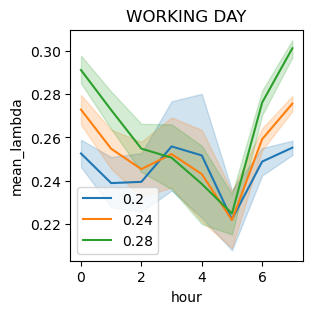

In [ ]:
# sd "confidence interval"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (3,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([0,1,2,3,4])) & (df.shared_discount == d) & (df.Start_time.dt.hour.isin([0,1,2,3,4,5,6,7]))]
    sns.lineplot(data = to_plot, x = 'hour', y = 'mean_lambda', ax = ax, label = d, errorbar ='ci')
plt.legend()
plt.ylabel("mean_lambda")
plt.title("WORKING DAY")

NameError: name 'df' is not defined

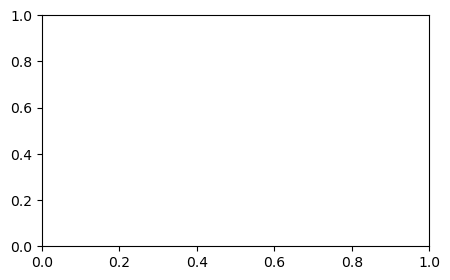

In [4]:
# sd "standard deviation"
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (5,3))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek.isin([5,6])) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'mean_lambda', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("mean_lambda")
plt.title("WEEKEND")

##### import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,2))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek>=5) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'del_VehHourTrav', ax = ax, label = d, errorbar ='sd')
plt.legend()
plt.ylabel("$\Delta$ VehHourTrav") 

Text(0, 0.5, '$\\Delta$ VehHourTrav')

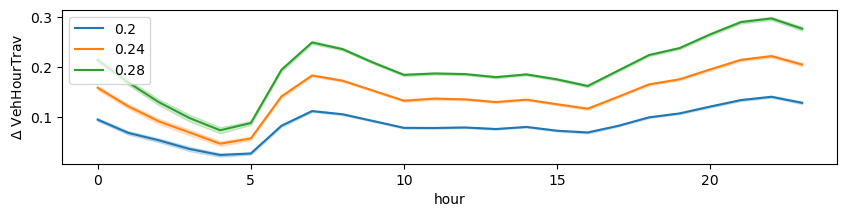

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,2))
df['hour'] = df.Start_time.dt.hour
for d in df.shared_discount.unique():
    to_plot = df[(df.Start_time.dt.dayofweek<5) & (df.shared_discount == d)]
    sns.lineplot(data = to_plot, x = 'hour', y = 'del_VehHourTrav', ax = ax, label = d, errorbar ='se')
plt.legend()
plt.ylabel("$\Delta$ VehHourTrav") 

In [ ]:
to_plot = df[(df.Start_time.dt.dayofweek==0) & (df.shared_discount == 0.2)]
sns.lineplot

<function seaborn.relational.lineplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, units=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, orient='x', sort=True, err_style='band', err_kws=None, legend='auto', ci='deprecated', ax=None, **kwargs)>

Text(0, 0.5, 'del_VehHourTrav')

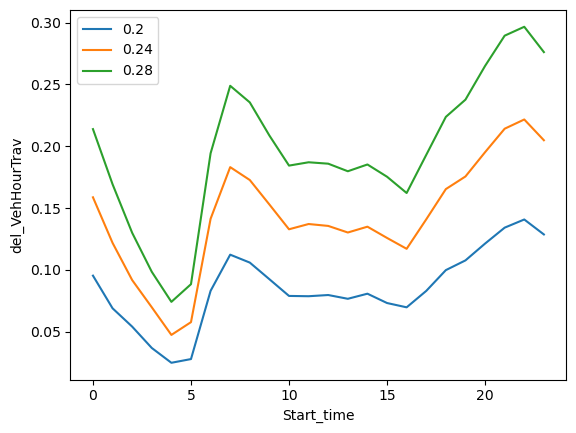

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for d in df.shared_discount.unique():
    df[(df.Start_time.dt.dayofweek<5) & (df.shared_discount == d)].groupby(df.Start_time.dt.hour).del_VehHourTrav.mean().plot(ax = ax, label = d)
plt.legend()
plt.ylabel("del_VehHourTrav")

In [ ]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>